# Assignment Nural Networks Forest Fires
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

#
Import Libraries

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold
import tensorflow  as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout

In [ ]:
from sklearn.model_selection import train_test_split

# Uploading Data

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
Data=pd.read_csv("forestfires.csv")

# EDA

In [ ]:
Data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
Data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let us make dummy values for days and drop month column since it already have dummy features.

In [ ]:
Data["month"].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [ ]:
Data=pd.get_dummies(Data,columns=["day"])


In [ ]:
Data

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthoct,monthsep,size_category,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,...,0,0,small,1,0,0,0,0,0,0
1,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,...,1,0,small,0,0,0,0,0,1,0
2,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,...,1,0,small,0,0,1,0,0,0,0
3,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,...,0,0,small,1,0,0,0,0,0,0
4,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,...,0,0,small,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,...,0,0,large,0,0,0,1,0,0,0
513,aug,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,...,0,0,large,0,0,0,1,0,0,0
514,aug,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,...,0,0,large,0,0,0,1,0,0,0
515,aug,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,...,0,0,small,0,0,1,0,0,0,0


In [ ]:
Data.drop("month",axis=1,inplace=True)

In [ ]:
Data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthoct,monthsep,size_category,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,small,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,1,0,small,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,1,0,small,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,small,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,small,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,large,0,0,0,1,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,large,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,large,0,0,0,1,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,small,0,0,1,0,0,0,0


# Label Encoding for target variable "size_category"

In [ ]:
Data["size_category"].unique()

array(['small', 'large'], dtype=object)


large------->0

small------->1

In [ ]:
Label=LabelEncoder()

In [ ]:
Data["size_category"]=Label.fit_transform(Data[["size_category"]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Data.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthoct,monthsep,size_category,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,1,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,1,0,1,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,1,0,1,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,1,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,1,0,0,0,1,0,0,0


#Splitting For X and Y

In [ ]:
X=Data.drop("size_category",axis=1)

In [ ]:
Y=Data["size_category"]

In [ ]:
X.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthnov,monthoct,monthsep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
Y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: size_category, dtype: int64

# SCALING

In [ ]:
scale=StandardScaler()

In [ ]:
scaled_data=scale.fit_transform(X)

In [ ]:
X=pd.DataFrame(scaled_data,columns=X.columns)

In [ ]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthnov,monthoct,monthsep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,2.254407,...,-0.044023,-0.172860,-0.706081,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,-0.443576,...,-0.044023,5.785038,-0.706081,-0.443576,-0.408709,-0.440449,-0.474467,-0.365748,2.660475,-0.341512
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,-0.443576,...,-0.044023,5.785038,-0.706081,-0.443576,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,2.254407,...,-0.044023,-0.172860,-0.706081,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,-0.443576,...,-0.044023,-0.172860,-0.706081,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,-0.443576,...,-0.044023,-0.172860,-0.706081,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,-0.443576,...,-0.044023,-0.172860,-0.706081,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,-0.443576,...,-0.044023,-0.172860,-0.706081,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,-0.443576,...,-0.044023,-0.172860,-0.706081,-0.443576,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512


# Split the data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# Model with Manually assigned parameters

In [ ]:
dropout_rate=0.2
activation_function = 'relu'
init = 'zero'
batch_size = 100
epochs = 50

In [ ]:
model1=Sequential()
model1.add(Dense(12,input_dim=35,activation='sigmoid'))
model1.add(Dropout(dropout_rate))
model1.add(Dense(10,activation='sigmoid'))
model1.add(Dropout(dropout_rate))
model1.add(Dense(10,activation='sigmoid'))
model1.add(Dropout(dropout_rate))
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(loss ='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                432       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
scores=model1.evaluate(X_train,y_train)

13/13 [==============================] - 1s 2ms/step - loss: 0.6404 - accuracy: 0.7312


In [ ]:
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

accuracy: 73.12%


In [ ]:
# Fit the model on the training data only
history = model1.fit(X,Y,validation_data=[X_train,y_train],epochs=50, batch_size=100)

Epoch 1/50
6/6 [==============================] - 1s 14ms/step - loss: 0.6563 - accuracy: 0.6402 - val_loss: 0.6343 - val_accuracy: 0.7312
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6364 - accuracy: 0.6441 - val_loss: 0.6293 - val_accuracy: 0.7312
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6508 - accuracy: 0.6557 - val_loss: 0.6240 - val_accuracy: 0.7312
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6365 - accuracy: 0.6634 - val_loss: 0.6201 - val_accuracy: 0.7312
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6423 - accuracy: 0.6692 - val_loss: 0.6168 - val_accuracy: 0.7312
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.6374 - accuracy: 0.6615 - val_loss: 0.6132 - val_accuracy: 0.7312
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6326 - accuracy: 0.6654 - val_loss: 0.6107 - val_accuracy: 0.7312
Epoch 8/50
6/6 [================

In [ ]:
#history=model1.fit(X, Y, validation_split=0.20, epochs=50, batch_size=100)


In [ ]:
model1.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Accuracy and Loss visualization

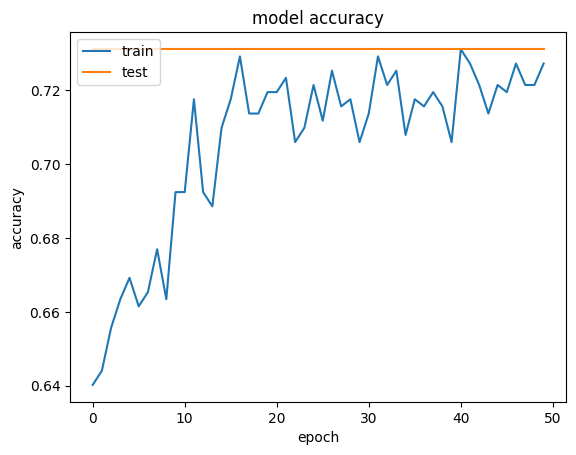

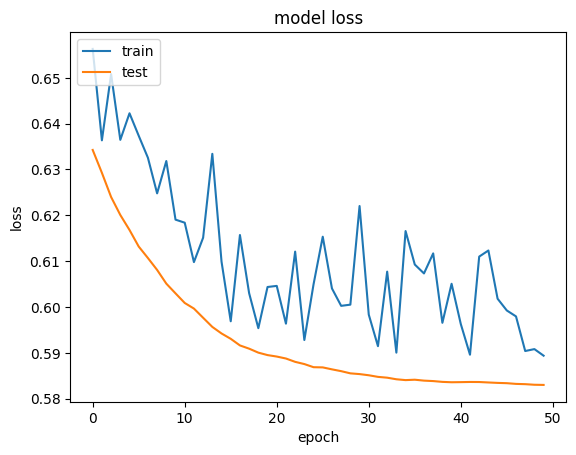

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Nural Network Model Bulding with hyperparameter tuning
Model building by using Adam Optimizer

In [ ]:
def createmodel(neuron1,neuron2,init,activation_function,learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=35,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

In [ ]:
model=KerasClassifier(build_fn=createmodel,verbose=0)

<ipython-input-41-177179684bd2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=createmodel,verbose=0)


# Grid Search CV

In [ ]:
neuron1=[10,20]
neuron2=[5,10]
learning_rate=[0.1,0.01]
drop_out_rate=[0.1,0.2]
activation_function = ['softmax','relu','linear']
init = ['uniform','normal','zero']
batch_size = [20,40]
epochs = [50,100]

In [ ]:
param_grid=dict(batch_size=batch_size,epochs=epochs,init=init,activation_function=activation_function,learning_rate=learning_rate,dropout_rate=drop_out_rate,
                neuron1=neuron1,neuron2=neuron2)

In [ ]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5; 1/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   2.3s
[CV 2/5; 1/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   2.0s
[CV 3/5; 1/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.723 total time=   1.6s
[CV 4/5; 1/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   1.9s
[CV 5/5; 1/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.780 total time=   1.6s
[CV 1/5; 2/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.795 total time=   1.9s
[CV 2/5; 2/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 2/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.723 total time=   2.1s
[CV 4/5; 2/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.744 total time=   1.9s
[CV 5/5; 2/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.817 total time=   1.6s
[CV 1/5; 3/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.783 total time=   1.9s
[CV 2/5; 3/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.723 total time=   1.6s
[CV 3/5; 3/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   2.0s
[CV 4/5; 3/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.780 total time=   3.2s
[CV 5/5; 3/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.793 total time=   1.6s
[CV 1/5; 4/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.723 total time=   1.6s
[CV 2/5; 4/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.6s
[CV 3/5; 4/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.6s
[CV 4/5; 4/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.793 total time=   1.9s
[CV 5/5; 4/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.793 total time=   1.9s
[CV 1/5; 5/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   2.0s
[CV 2/5; 5/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.855 total time=   1.6s
[CV 3/5; 5/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   1.6s
[CV 4/5; 5/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   1.8s
[CV 5/5; 5/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.902 total time=   1.9s
[CV 1/5; 6/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   1.9s
[CV 2/5; 6/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   1.9s
[CV 3/5; 6/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.940 total time=   2.3s
[CV 4/5; 6/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.915 total time=   1.9s
[CV 5/5; 6/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   1.9s
[CV 1/5; 7/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.819 total time=   1.7s
[CV 2/5; 7/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.9s
[CV 3/5; 7/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   1.9s
[CV 4/5; 7/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   1.9s
[CV 5/5; 7/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   1.9s
[CV 1/5; 8/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.807 total time=   3.2s
[CV 2/5; 8/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.795 total time=   1.9s
[CV 3/5; 8/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   3.2s
[CV 4/5; 8/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   1.8s
[CV 5/5; 8/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.890 total time=   1.6s
[CV 1/5; 9/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.795 total time=   1.9s
[CV 2/5; 9/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.6s
[CV 3/5; 9/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   2.1s
[CV 4/5; 9/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   2.1s
[CV 5/5; 9/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.793 total time=   1.9s
[CV 1/5; 10/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 10/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   1.7s
[CV 2/5; 10/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 10/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 3/5; 10/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 10/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.687 total time=   1.9s
[CV 4/5; 10/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 10/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.695 total time=   1.9s
[CV 5/5; 10/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 10/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.0s
[CV 1/5; 11/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 11/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.6s
[CV 2/5; 11/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 11/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.6s
[CV 3/5; 11/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 11/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.687 total time=   1.6s
[CV 4/5; 11/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 11/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.756 total time=   1.9s
[CV 5/5; 11/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 11/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.805 total time=   1.6s
[CV 1/5; 12/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 12/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.771 total time=   1.9s
[CV 2/5; 12/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 12/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   3.3s
[CV 3/5; 12/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 12/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.663 total time=   2.3s
[CV 4/5; 12/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 12/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.720 total time=   1.9s
[CV 5/5; 12/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 12/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.817 total time=   1.9s
[CV 1/5; 13/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 13/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.855 total time=   1.9s
[CV 2/5; 13/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 13/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   2.0s
[CV 3/5; 13/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 13/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   1.9s
[CV 4/5; 13/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 13/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   2.7s
[CV 5/5; 13/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 13/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.890 total time=   3.6s
[CV 1/5; 14/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 14/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   2.0s
[CV 2/5; 14/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 14/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.855 total time=   2.2s
[CV 3/5; 14/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 14/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   2.4s
[CV 4/5; 14/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 14/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   1.9s
[CV 5/5; 14/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 14/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   3.2s
[CV 1/5; 15/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 15/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.843 total time=   1.9s
[CV 2/5; 15/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 15/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   1.8s
[CV 3/5; 15/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 15/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.6s
[CV 4/5; 15/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 15/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   2.4s
[CV 5/5; 15/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 15/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   1.9s
[CV 1/5; 16/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 16/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.831 total time=   1.6s
[CV 2/5; 16/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 16/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   3.2s
[CV 3/5; 16/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 16/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   2.3s
[CV 4/5; 16/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 16/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.841 total time=   1.6s
[CV 5/5; 16/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 16/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.866 total time=   1.6s
[CV 1/5; 17/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 17/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.819 total time=   1.6s
[CV 2/5; 17/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 17/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 17/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 17/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   2.6s
[CV 4/5; 17/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 17/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.756 total time=   1.9s
[CV 5/5; 17/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 17/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   1.6s
[CV 1/5; 18/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 18/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   1.9s
[CV 2/5; 18/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 18/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.723 total time=   3.4s
[CV 3/5; 18/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 18/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.723 total time=   1.9s
[CV 4/5; 18/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 18/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.817 total time=   2.6s
[CV 5/5; 18/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 18/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.817 total time=   1.7s
[CV 1/5; 19/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 19/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.723 total time=   2.0s
[CV 2/5; 19/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 19/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.687 total time=   2.4s
[CV 3/5; 19/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 19/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.723 total time=   1.7s
[CV 4/5; 19/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 19/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.3s
[CV 5/5; 19/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 19/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.695 total time=   4.0s
[CV 1/5; 20/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 20/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.795 total time=   3.8s
[CV 2/5; 20/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 20/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.687 total time=   1.8s
[CV 3/5; 20/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 20/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.687 total time=   2.0s
[CV 4/5; 20/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 20/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 20/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 20/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.793 total time=   2.4s
[CV 1/5; 21/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 21/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   2.2s
[CV 2/5; 21/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 21/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.6s
[CV 3/5; 21/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 21/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   1.9s
[CV 4/5; 21/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 21/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.890 total time=   1.8s
[CV 5/5; 21/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 21/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   2.4s
[CV 1/5; 22/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 22/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.819 total time=   2.0s
[CV 2/5; 22/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 22/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.819 total time=   1.9s
[CV 3/5; 22/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 22/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.7s
[CV 4/5; 22/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 22/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.915 total time=   3.3s
[CV 5/5; 22/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 22/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   2.3s
[CV 1/5; 23/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 23/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.819 total time=   2.0s
[CV 2/5; 23/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 23/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.819 total time=   1.9s
[CV 3/5; 23/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 23/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.9s
[CV 4/5; 23/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 23/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   3.2s
[CV 5/5; 23/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 23/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.890 total time=   1.9s
[CV 1/5; 24/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 24/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   3.2s
[CV 2/5; 24/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 24/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   3.4s
[CV 3/5; 24/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 24/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   5.0s
[CV 4/5; 24/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 24/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   1.6s
[CV 5/5; 24/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 24/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   2.0s
[CV 1/5; 25/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 25/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   4.2s
[CV 2/5; 25/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 25/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.3s
[CV 3/5; 25/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 25/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   3.5s
[CV 4/5; 25/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 25/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.817 total time=   3.2s
[CV 5/5; 25/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 25/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.707 total time=   3.3s
[CV 1/5; 26/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 26/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.771 total time=   3.7s
[CV 2/5; 26/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 26/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   3.2s
[CV 3/5; 26/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 26/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   2.7s
[CV 4/5; 26/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 26/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.780 total time=   5.7s
[CV 5/5; 26/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 26/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.805 total time=   3.2s
[CV 1/5; 27/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 27/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.795 total time=   5.7s
[CV 2/5; 27/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 27/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   5.7s
[CV 3/5; 27/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 27/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.687 total time=   3.2s
[CV 4/5; 27/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 27/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.805 total time=   5.8s
[CV 5/5; 27/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 27/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.756 total time=   3.2s
[CV 1/5; 28/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 28/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   6.5s
[CV 2/5; 28/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 28/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   3.0s
[CV 3/5; 28/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 28/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   3.0s
[CV 4/5; 28/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 28/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.780 total time=   3.3s
[CV 5/5; 28/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 28/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   3.5s
[CV 1/5; 29/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 29/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   2.8s
[CV 2/5; 29/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 29/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   3.3s
[CV 3/5; 29/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 29/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   3.3s
[CV 4/5; 29/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 29/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   3.2s
[CV 5/5; 29/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 29/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   5.9s
[CV 1/5; 30/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 30/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   5.8s
[CV 2/5; 30/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 30/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   3.4s
[CV 3/5; 30/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 30/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.940 total time=   6.3s
[CV 4/5; 30/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 30/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.927 total time=   3.3s
[CV 5/5; 30/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 30/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   3.3s
[CV 1/5; 31/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 31/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   3.2s
[CV 2/5; 31/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 31/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.843 total time=   3.7s
[CV 3/5; 31/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 31/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   3.6s
[CV 4/5; 31/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 31/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   3.3s
[CV 5/5; 31/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 31/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   3.3s
[CV 1/5; 32/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 32/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   3.4s
[CV 2/5; 32/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 32/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   3.2s
[CV 3/5; 32/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 32/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   3.2s
[CV 4/5; 32/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 32/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.939 total time=   3.0s
[CV 5/5; 32/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 32/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   2.6s
[CV 1/5; 33/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 33/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.795 total time=   3.2s
[CV 2/5; 33/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 33/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.819 total time=   3.3s
[CV 3/5; 33/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 33/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.2s
[CV 4/5; 33/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 33/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.793 total time=   3.1s
[CV 5/5; 33/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 33/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   3.2s
[CV 1/5; 34/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 34/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   3.3s
[CV 2/5; 34/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 34/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.771 total time=   3.2s
[CV 3/5; 34/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 34/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   3.7s
[CV 4/5; 34/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 34/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.829 total time=   3.7s
[CV 5/5; 34/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 34/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.829 total time=   2.7s
[CV 1/5; 35/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 35/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.771 total time=   3.2s
[CV 2/5; 35/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 35/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.759 total time=   2.8s
[CV 3/5; 35/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 35/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.723 total time=   3.3s
[CV 4/5; 35/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 35/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.780 total time=   5.8s
[CV 5/5; 35/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 35/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.744 total time=   5.7s
[CV 1/5; 36/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 36/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.687 total time=   3.2s
[CV 2/5; 36/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 36/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   3.2s
[CV 3/5; 36/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 36/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.783 total time=   3.4s
[CV 4/5; 36/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 36/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.720 total time=   3.2s
[CV 5/5; 36/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 36/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.805 total time=   2.6s
[CV 1/5; 37/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 37/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   2.6s
[CV 2/5; 37/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 37/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   2.9s
[CV 3/5; 37/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 37/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   3.3s
[CV 4/5; 37/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 37/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.951 total time=   3.2s
[CV 5/5; 37/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 37/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.902 total time=   3.2s
[CV 1/5; 38/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 38/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   3.2s
[CV 2/5; 38/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 38/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   2.7s
[CV 3/5; 38/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 38/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   2.8s
[CV 4/5; 38/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 38/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   3.2s
[CV 5/5; 38/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 38/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.915 total time=   6.3s
[CV 1/5; 39/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 39/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   2.7s
[CV 2/5; 39/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 39/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.807 total time=   3.2s
[CV 3/5; 39/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 39/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   3.2s
[CV 4/5; 39/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 39/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   3.1s
[CV 5/5; 39/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 39/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.890 total time=   3.2s
[CV 1/5; 40/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 40/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   3.2s
[CV 2/5; 40/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 40/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   3.3s
[CV 3/5; 40/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 40/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   2.5s
[CV 4/5; 40/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 40/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.890 total time=   2.6s
[CV 5/5; 40/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 40/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.890 total time=   3.8s
[CV 1/5; 41/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 41/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.819 total time=   2.7s
[CV 2/5; 41/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 41/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.795 total time=   3.2s
[CV 3/5; 41/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 41/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   3.2s
[CV 4/5; 41/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 41/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   3.2s
[CV 5/5; 41/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 41/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.829 total time=   3.2s
[CV 1/5; 42/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 42/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.795 total time=   3.2s
[CV 2/5; 42/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 42/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.723 total time=   3.2s
[CV 3/5; 42/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 42/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.687 total time=   3.6s
[CV 4/5; 42/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 42/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.756 total time=   3.2s
[CV 5/5; 42/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 42/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.756 total time=   3.2s
[CV 1/5; 43/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 43/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.795 total time=   3.2s
[CV 2/5; 43/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 43/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 43/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 43/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.687 total time=   2.7s
[CV 4/5; 43/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 43/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 43/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 43/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.1s
[CV 1/5; 44/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 44/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.7s
[CV 2/5; 44/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 44/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   2.9s
[CV 3/5; 44/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 44/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.7s
[CV 4/5; 44/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 44/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.793 total time=   3.1s
[CV 5/5; 44/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 44/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.805 total time=   3.2s
[CV 1/5; 45/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 45/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   3.2s
[CV 2/5; 45/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 45/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   3.3s
[CV 3/5; 45/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 45/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   3.3s
[CV 4/5; 45/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 45/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.951 total time=   2.6s
[CV 5/5; 45/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 45/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   3.2s
[CV 1/5; 46/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 46/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   3.2s
[CV 2/5; 46/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 46/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   3.1s
[CV 3/5; 46/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 46/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   2.6s
[CV 4/5; 46/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 46/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   2.6s
[CV 5/5; 46/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 46/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.902 total time=   3.2s
[CV 1/5; 47/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 47/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.807 total time=   2.6s
[CV 2/5; 47/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 47/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   3.7s
[CV 3/5; 47/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 47/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   3.3s
[CV 4/5; 47/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 47/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   3.3s
[CV 5/5; 47/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 47/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   3.2s
[CV 1/5; 48/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 48/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   3.2s
[CV 2/5; 48/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 48/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   3.2s
[CV 3/5; 48/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 48/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   3.3s
[CV 4/5; 48/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 48/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   2.6s
[CV 5/5; 48/576] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 48/576] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.890 total time=   2.7s
[CV 1/5; 49/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 49/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.807 total time=   2.0s
[CV 2/5; 49/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 49/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   2.1s
[CV 3/5; 49/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 49/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 4/5; 49/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 49/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.6s
[CV 5/5; 49/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 49/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.756 total time=   1.9s
[CV 1/5; 50/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 50/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.6s
[CV 2/5; 50/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 50/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.771 total time=   1.6s
[CV 3/5; 50/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 50/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.711 total time=   2.0s
[CV 4/5; 50/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 50/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.780 total time=   2.6s
[CV 5/5; 50/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 50/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.695 total time=   1.7s
[CV 1/5; 51/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 51/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.771 total time=   1.9s
[CV 2/5; 51/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 51/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.759 total time=   1.7s
[CV 3/5; 51/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 51/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 51/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 51/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.756 total time=   3.2s
[CV 5/5; 51/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 51/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.7s
[CV 1/5; 52/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 52/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   1.9s
[CV 2/5; 52/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 52/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.7s
[CV 3/5; 52/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 52/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.723 total time=   1.6s
[CV 4/5; 52/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 52/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.756 total time=   1.7s
[CV 5/5; 52/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 52/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.780 total time=   2.0s
[CV 1/5; 53/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 53/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   1.9s
[CV 2/5; 53/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 53/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.831 total time=   1.6s
[CV 3/5; 53/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 53/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   1.9s
[CV 4/5; 53/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 53/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   1.9s
[CV 5/5; 53/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 53/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.890 total time=   1.9s
[CV 1/5; 54/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 54/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   3.9s
[CV 2/5; 54/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 54/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   2.0s
[CV 3/5; 54/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 54/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.7s
[CV 4/5; 54/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 54/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   1.7s
[CV 5/5; 54/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 54/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   1.7s
[CV 1/5; 55/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 55/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.783 total time=   2.0s
[CV 2/5; 55/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 55/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   1.9s
[CV 3/5; 55/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 55/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   1.7s
[CV 4/5; 55/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 55/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.902 total time=   1.7s
[CV 5/5; 55/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 55/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   1.9s
[CV 1/5; 56/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 56/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.9s
[CV 2/5; 56/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 56/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.855 total time=   1.9s
[CV 3/5; 56/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 56/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   2.1s
[CV 4/5; 56/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 56/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   1.6s
[CV 5/5; 56/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 56/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   1.9s
[CV 1/5; 57/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 57/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.723 total time=   1.9s
[CV 2/5; 57/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 57/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.723 total time=   2.5s
[CV 3/5; 57/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 57/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.711 total time=   2.0s
[CV 4/5; 57/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 57/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.744 total time=   2.1s
[CV 5/5; 57/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 57/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.756 total time=   1.9s
[CV 1/5; 58/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 58/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 58/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 58/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   1.7s
[CV 3/5; 58/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 58/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 4/5; 58/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 58/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.707 total time=   1.7s
[CV 5/5; 58/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 58/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   3.3s
[CV 1/5; 59/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 59/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.783 total time=   1.7s
[CV 2/5; 59/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 59/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.807 total time=   1.7s
[CV 3/5; 59/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 59/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.627 total time=   1.9s
[CV 4/5; 59/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 59/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.744 total time=   1.9s
[CV 5/5; 59/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 59/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.780 total time=   1.7s
[CV 1/5; 60/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 60/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.771 total time=   1.9s
[CV 2/5; 60/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 60/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.795 total time=   1.9s
[CV 3/5; 60/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 60/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.6s
[CV 4/5; 60/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 60/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.695 total time=   2.3s
[CV 5/5; 60/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 60/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.805 total time=   1.7s
[CV 1/5; 61/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 61/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.843 total time=   1.9s
[CV 2/5; 61/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 61/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.831 total time=   3.4s
[CV 3/5; 61/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 61/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.6s
[CV 4/5; 61/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 61/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   1.6s
[CV 5/5; 61/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 61/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   1.9s
[CV 1/5; 62/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 62/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.795 total time=   1.7s
[CV 2/5; 62/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 62/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   2.0s
[CV 3/5; 62/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 62/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   2.1s
[CV 4/5; 62/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 62/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.902 total time=   1.7s
[CV 5/5; 62/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 62/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   1.9s
[CV 1/5; 63/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 63/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.819 total time=   1.7s
[CV 2/5; 63/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 63/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   1.6s
[CV 3/5; 63/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 63/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   3.2s
[CV 4/5; 63/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 63/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   1.6s
[CV 5/5; 63/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 63/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.902 total time=   1.6s
[CV 1/5; 64/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 64/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   2.3s
[CV 2/5; 64/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 64/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   1.7s
[CV 3/5; 64/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 64/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   1.7s
[CV 4/5; 64/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 64/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   2.0s
[CV 5/5; 64/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 64/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.890 total time=   1.8s
[CV 1/5; 65/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 65/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.807 total time=   1.9s
[CV 2/5; 65/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 65/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.6s
[CV 3/5; 65/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 65/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.6s
[CV 4/5; 65/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 65/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.756 total time=   1.9s
[CV 5/5; 65/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 65/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.7s
[CV 1/5; 66/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 66/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.807 total time=   2.1s
[CV 2/5; 66/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 66/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   1.7s
[CV 3/5; 66/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 66/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 4/5; 66/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 66/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.817 total time=   1.9s
[CV 5/5; 66/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 66/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.6s
[CV 1/5; 67/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 67/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.711 total time=   1.9s
[CV 2/5; 67/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 67/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.723 total time=   2.7s
[CV 3/5; 67/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 67/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.663 total time=   2.0s
[CV 4/5; 67/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 67/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.756 total time=   1.8s
[CV 5/5; 67/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 67/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 68/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 68/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.699 total time=   1.6s
[CV 2/5; 68/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 68/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.651 total time=   1.9s
[CV 3/5; 68/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 68/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.687 total time=   3.3s
[CV 4/5; 68/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 68/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.744 total time=   1.7s
[CV 5/5; 68/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 68/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.720 total time=   1.7s
[CV 1/5; 69/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 69/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.855 total time=   1.9s
[CV 2/5; 69/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 69/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   1.9s
[CV 3/5; 69/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 69/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   2.0s
[CV 4/5; 69/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 69/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   1.9s
[CV 5/5; 69/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 69/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.890 total time=   1.6s
[CV 1/5; 70/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 70/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   1.9s
[CV 2/5; 70/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 70/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   1.6s
[CV 3/5; 70/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 70/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   2.0s
[CV 4/5; 70/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 70/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.866 total time=   2.7s
[CV 5/5; 70/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 70/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   2.2s
[CV 1/5; 71/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 71/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.795 total time=   1.9s
[CV 2/5; 71/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 71/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   1.9s
[CV 3/5; 71/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 71/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   1.9s
[CV 4/5; 71/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 71/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.927 total time=   1.9s
[CV 5/5; 71/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 71/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   2.0s
[CV 1/5; 72/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 72/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.855 total time=   1.8s
[CV 2/5; 72/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 72/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.9s
[CV 3/5; 72/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 72/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   1.9s
[CV 4/5; 72/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 72/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   1.9s
[CV 5/5; 72/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 72/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.866 total time=   1.9s
[CV 1/5; 73/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 73/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   3.1s
[CV 2/5; 73/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 73/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.795 total time=   3.2s
[CV 3/5; 73/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 73/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 73/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 73/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.756 total time=   3.2s
[CV 5/5; 73/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 73/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   3.0s
[CV 1/5; 74/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 74/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.771 total time=   3.4s
[CV 2/5; 74/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 74/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.807 total time=   3.2s
[CV 3/5; 74/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 74/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.663 total time=   3.3s
[CV 4/5; 74/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 74/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.744 total time=   3.4s
[CV 5/5; 74/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 74/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   3.2s
[CV 1/5; 75/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 75/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.795 total time=   3.2s
[CV 2/5; 75/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 75/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.771 total time=   5.8s
[CV 3/5; 75/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 75/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.687 total time=   2.7s
[CV 4/5; 75/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 75/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.671 total time=   3.2s
[CV 5/5; 75/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 75/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.805 total time=   5.8s
[CV 1/5; 76/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 76/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   2.6s
[CV 2/5; 76/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 76/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.795 total time=   3.2s
[CV 3/5; 76/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 76/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   3.2s
[CV 4/5; 76/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 76/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.2s
[CV 5/5; 76/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 76/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.793 total time=   2.6s
[CV 1/5; 77/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 77/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   3.2s
[CV 2/5; 77/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 77/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.855 total time=   3.6s
[CV 3/5; 77/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 77/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   3.3s
[CV 4/5; 77/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 77/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   2.7s
[CV 5/5; 77/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 77/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   3.3s
[CV 1/5; 78/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 78/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   2.9s
[CV 2/5; 78/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 78/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   2.7s
[CV 3/5; 78/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 78/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   3.2s
[CV 4/5; 78/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 78/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   3.2s
[CV 5/5; 78/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 78/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.854 total time=   2.8s
[CV 1/5; 79/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 79/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   2.7s
[CV 2/5; 79/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 79/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   3.2s
[CV 3/5; 79/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 79/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   3.2s
[CV 4/5; 79/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 79/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   2.7s
[CV 5/5; 79/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 79/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.890 total time=   3.2s
[CV 1/5; 80/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 80/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.855 total time=   2.5s
[CV 2/5; 80/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 80/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   3.2s
[CV 3/5; 80/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 80/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   3.2s
[CV 4/5; 80/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 80/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   3.3s
[CV 5/5; 80/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 80/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   2.8s
[CV 1/5; 81/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 81/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.795 total time=   6.0s
[CV 2/5; 81/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 81/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.723 total time=   3.2s
[CV 3/5; 81/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 81/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.639 total time=   3.2s
[CV 4/5; 81/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 81/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 81/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 81/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   3.2s
[CV 1/5; 82/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 82/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.795 total time=   3.2s
[CV 2/5; 82/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 82/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   2.7s
[CV 3/5; 82/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 82/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.687 total time=   3.3s
[CV 4/5; 82/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 82/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.817 total time=   3.2s
[CV 5/5; 82/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 82/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.744 total time=   2.6s
[CV 1/5; 83/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 83/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.771 total time=   3.2s
[CV 2/5; 83/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 83/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.759 total time=   2.8s
[CV 3/5; 83/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 83/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.699 total time=   3.2s
[CV 4/5; 83/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 83/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.817 total time=   3.2s
[CV 5/5; 83/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 83/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.817 total time=   3.2s
[CV 1/5; 84/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 84/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.783 total time=   3.9s
[CV 2/5; 84/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 84/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.771 total time=   2.7s
[CV 3/5; 84/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 84/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.663 total time=   3.3s
[CV 4/5; 84/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 84/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.1s
[CV 5/5; 84/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 84/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.805 total time=   3.2s
[CV 1/5; 85/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 85/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.807 total time=   3.2s
[CV 2/5; 85/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 85/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   3.2s
[CV 3/5; 85/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 85/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   3.3s
[CV 4/5; 85/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 85/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   3.2s
[CV 5/5; 85/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 85/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   3.2s
[CV 1/5; 86/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 86/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   3.1s
[CV 2/5; 86/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 86/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.855 total time=   3.2s
[CV 3/5; 86/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 86/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   3.2s
[CV 4/5; 86/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 86/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.927 total time=   2.7s
[CV 5/5; 86/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 86/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.915 total time=   3.3s
[CV 1/5; 87/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 87/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   2.6s
[CV 2/5; 87/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 87/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   3.8s
[CV 3/5; 87/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 87/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   3.4s
[CV 4/5; 87/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 87/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   3.3s
[CV 5/5; 87/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 87/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.890 total time=   3.2s
[CV 1/5; 88/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 88/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   3.2s
[CV 2/5; 88/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 88/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   3.2s
[CV 3/5; 88/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 88/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   3.2s
[CV 4/5; 88/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 88/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.939 total time=   3.2s
[CV 5/5; 88/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 88/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   2.7s
[CV 1/5; 89/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 89/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.602 total time=   3.0s
[CV 2/5; 89/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 89/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   2.7s
[CV 3/5; 89/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 89/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 89/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 89/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   2.6s
[CV 5/5; 89/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 89/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.817 total time=   3.0s
[CV 1/5; 90/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 90/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   2.6s
[CV 2/5; 90/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 90/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   2.6s
[CV 3/5; 90/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 90/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.687 total time=   3.2s
[CV 4/5; 90/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 90/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   3.7s
[CV 5/5; 90/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 90/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.8s
[CV 1/5; 91/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 91/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.819 total time=   2.8s
[CV 2/5; 91/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 91/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.783 total time=   3.3s
[CV 3/5; 91/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 91/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   3.4s
[CV 4/5; 91/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 91/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 91/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 91/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.780 total time=   3.2s
[CV 1/5; 92/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 92/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 2/5; 92/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 92/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.771 total time=   2.6s
[CV 3/5; 92/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 92/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.687 total time=   2.7s
[CV 4/5; 92/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 92/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.707 total time=   3.2s
[CV 5/5; 92/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 92/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   5.7s
[CV 1/5; 93/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 93/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.855 total time=   5.9s
[CV 2/5; 93/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 93/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   3.5s
[CV 3/5; 93/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 93/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   3.2s
[CV 4/5; 93/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 93/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   5.7s
[CV 5/5; 93/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 93/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   4.0s
[CV 1/5; 94/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 94/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   3.8s
[CV 2/5; 94/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 94/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   3.7s
[CV 3/5; 94/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 94/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.964 total time=   3.2s
[CV 4/5; 94/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 94/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.939 total time=   2.8s
[CV 5/5; 94/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 94/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   3.2s
[CV 1/5; 95/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 95/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.807 total time=   3.2s
[CV 2/5; 95/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 95/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   3.1s
[CV 3/5; 95/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 95/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   3.2s
[CV 4/5; 95/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 95/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.927 total time=   3.2s
[CV 5/5; 95/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 95/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.890 total time=   3.3s
[CV 1/5; 96/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 96/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   2.7s
[CV 2/5; 96/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 96/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   2.6s
[CV 3/5; 96/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 96/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   3.2s
[CV 4/5; 96/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 96/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.927 total time=   3.2s
[CV 5/5; 96/576] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 96/576] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.866 total time=   2.6s
[CV 1/5; 97/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 97/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   1.3s
[CV 2/5; 97/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 97/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   1.2s
[CV 3/5; 97/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 97/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   1.2s
[CV 4/5; 97/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 97/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.841 total time=   2.0s
[CV 5/5; 97/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 97/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.780 total time=   1.4s
[CV 1/5; 98/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10
[CV 1/5; 98/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   2.1s
[CV 2/5; 98/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 98/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   1.3s
[CV 3/5; 98/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 98/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.771 total time=   1.3s
[CV 4/5; 98/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 98/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.866 total time=   1.3s
[CV 5/5; 98/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 98/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.854 total time=   1.9s
[CV 1/5; 99/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 99/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.699 total time=   1.3s
[CV 2/5; 99/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 99/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.771 total time=   1.3s
[CV 3/5; 99/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 99/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.723 total time=   2.0s
[CV 4/5; 99/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 99/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.744 total time=   1.4s
[CV 5/5; 99/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 99/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.780 total time=   1.2s
[CV 1/5; 100/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 100/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.783 total time=   1.3s
[CV 2/5; 100/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 100/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   1.2s
[CV 3/5; 100/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 100/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.711 total time=   1.2s
[CV 4/5; 100/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 100/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.780 total time=   1.3s
[CV 5/5; 100/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 100/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.3s
[CV 1/5; 101/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 101/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.819 total time=   2.0s
[CV 2/5; 101/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 101/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.843 total time=   2.2s
[CV 3/5; 101/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 101/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.3s
[CV 4/5; 101/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 101/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   1.3s
[CV 5/5; 101/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 101/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.866 total time=   1.3s
[CV 1/5; 102/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 102/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   1.3s
[CV 2/5; 102/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 102/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   1.2s
[CV 3/5; 102/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 102/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.855 total time=   1.3s
[CV 4/5; 102/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 102/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.866 total time=   1.2s
[CV 5/5; 102/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 102/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   2.0s
[CV 1/5; 103/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 103/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.783 total time=   1.9s
[CV 2/5; 103/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 103/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   1.3s
[CV 3/5; 103/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 103/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   1.2s
[CV 4/5; 103/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 103/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.854 total time=   1.2s
[CV 5/5; 103/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 103/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   1.3s
[CV 1/5; 104/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 104/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.819 total time=   1.3s
[CV 2/5; 104/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 104/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.819 total time=   1.2s
[CV 3/5; 104/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 104/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   2.3s
[CV 4/5; 104/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 104/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.841 total time=   1.4s
[CV 5/5; 104/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 104/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.866 total time=   1.3s
[CV 1/5; 105/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 105/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.795 total time=   1.4s
[CV 2/5; 105/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 105/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.795 total time=   1.3s
[CV 3/5; 105/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 105/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   1.3s
[CV 4/5; 105/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 105/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.780 total time=   1.2s
[CV 5/5; 105/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 105/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.817 total time=   1.3s
[CV 1/5; 106/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 106/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   2.0s
[CV 2/5; 106/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 106/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.3s
[CV 3/5; 106/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 106/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.3s
[CV 4/5; 106/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 106/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.793 total time=   1.3s
[CV 5/5; 106/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 106/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.817 total time=   1.3s
[CV 1/5; 107/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 107/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.783 total time=   1.3s
[CV 2/5; 107/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 107/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.795 total time=   1.2s
[CV 3/5; 107/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 107/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.759 total time=   1.2s
[CV 4/5; 107/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 107/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.756 total time=   1.3s
[CV 5/5; 107/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 107/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.817 total time=   1.6s
[CV 1/5; 108/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 108/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.0s
[CV 2/5; 108/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 108/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.4s
[CV 3/5; 108/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 108/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.3s
[CV 4/5; 108/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 108/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.3s
[CV 5/5; 108/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 108/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.829 total time=   1.3s
[CV 1/5; 109/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 109/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.807 total time=   1.3s
[CV 2/5; 109/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 109/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.819 total time=   1.2s
[CV 3/5; 109/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 109/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   2.1s
[CV 4/5; 109/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 109/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.866 total time=   1.3s
[CV 5/5; 109/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 109/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.854 total time=   1.3s
[CV 1/5; 110/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 110/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.807 total time=   1.3s
[CV 2/5; 110/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 110/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.855 total time=   1.3s
[CV 3/5; 110/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 110/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.855 total time=   1.2s
[CV 4/5; 110/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 110/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   1.3s
[CV 5/5; 110/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 110/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.854 total time=   1.3s
[CV 1/5; 111/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 111/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   1.9s
[CV 2/5; 111/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 111/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.843 total time=   1.3s
[CV 3/5; 111/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 111/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   2.0s
[CV 4/5; 111/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 111/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.854 total time=   1.4s
[CV 5/5; 111/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 111/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   2.0s
[CV 1/5; 112/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 112/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.795 total time=   1.4s
[CV 2/5; 112/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 112/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.855 total time=   1.9s
[CV 3/5; 112/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 112/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   1.7s
[CV 4/5; 112/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 112/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.866 total time=   1.3s
[CV 5/5; 112/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 112/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.841 total time=   1.3s
[CV 1/5; 113/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 113/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.783 total time=   1.2s
[CV 2/5; 113/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 113/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.831 total time=   1.3s
[CV 3/5; 113/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 113/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.627 total time=   1.3s
[CV 4/5; 113/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 113/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.780 total time=   1.2s
[CV 5/5; 113/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 113/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.817 total time=   1.2s
[CV 1/5; 114/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 114/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   1.2s
[CV 2/5; 114/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 114/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.819 total time=   2.1s
[CV 3/5; 114/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 114/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.639 total time=   1.3s
[CV 4/5; 114/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 114/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.695 total time=   1.2s
[CV 5/5; 114/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 114/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.841 total time=   1.8s
[CV 1/5; 115/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 115/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.4s
[CV 2/5; 115/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 115/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.0s
[CV 3/5; 115/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 115/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.759 total time=   1.3s
[CV 4/5; 115/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 115/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.817 total time=   2.0s
[CV 5/5; 115/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 115/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.805 total time=   1.9s
[CV 1/5; 116/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 116/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.807 total time=   1.3s
[CV 2/5; 116/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 116/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.723 total time=   1.2s
[CV 3/5; 116/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 116/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.699 total time=   1.3s
[CV 4/5; 116/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 116/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.780 total time=   1.2s
[CV 5/5; 116/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 116/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.756 total time=   1.2s
[CV 1/5; 117/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 117/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.843 total time=   1.3s
[CV 2/5; 117/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 117/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.831 total time=   2.0s
[CV 3/5; 117/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 117/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   1.2s
[CV 4/5; 117/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 117/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.890 total time=   1.2s
[CV 5/5; 117/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 117/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.854 total time=   1.2s
[CV 1/5; 118/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 118/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.819 total time=   1.2s
[CV 2/5; 118/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 118/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.855 total time=   1.3s
[CV 3/5; 118/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 118/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   2.0s
[CV 4/5; 118/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 118/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.902 total time=   1.4s
[CV 5/5; 118/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 118/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.829 total time=   1.8s
[CV 1/5; 119/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 119/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.771 total time=   2.0s
[CV 2/5; 119/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 119/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.819 total time=   1.9s
[CV 3/5; 119/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 119/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   1.3s
[CV 4/5; 119/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 119/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.854 total time=   1.3s
[CV 5/5; 119/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 119/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.854 total time=   1.3s
[CV 1/5; 120/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 120/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.783 total time=   1.2s
[CV 2/5; 120/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 120/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.831 total time=   1.3s
[CV 3/5; 120/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 120/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.6s
[CV 4/5; 120/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 120/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   1.3s
[CV 5/5; 120/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 120/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.866 total time=   1.2s
[CV 1/5; 121/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 121/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.8s
[CV 2/5; 121/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 121/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.831 total time=   1.9s
[CV 3/5; 121/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 121/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 4/5; 121/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 121/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.720 total time=   1.8s
[CV 5/5; 121/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 121/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.841 total time=   2.9s
[CV 1/5; 122/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 122/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.807 total time=   2.0s
[CV 2/5; 122/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 122/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.771 total time=   2.0s
[CV 3/5; 122/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 122/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 4/5; 122/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 122/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.841 total time=   1.9s
[CV 5/5; 122/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 122/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.866 total time=   3.3s
[CV 1/5; 123/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 123/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.759 total time=   1.9s
[CV 2/5; 123/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 123/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.795 total time=   1.9s
[CV 3/5; 123/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 123/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.771 total time=   1.9s
[CV 4/5; 123/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 123/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.854 total time=   1.9s
[CV 5/5; 123/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 123/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.805 total time=   2.2s
[CV 1/5; 124/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 124/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.819 total time=   2.1s
[CV 2/5; 124/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 124/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 124/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 124/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.723 total time=   1.8s
[CV 4/5; 124/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 124/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 5/5; 124/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 124/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.793 total time=   1.8s
[CV 1/5; 125/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 125/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.843 total time=   2.2s
[CV 2/5; 125/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 125/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   2.6s
[CV 3/5; 125/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 125/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   2.1s
[CV 4/5; 125/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 125/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   2.0s
[CV 5/5; 125/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 125/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   1.9s
[CV 1/5; 126/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 126/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   2.3s
[CV 2/5; 126/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 126/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   1.9s
[CV 3/5; 126/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 126/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   1.9s
[CV 4/5; 126/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 126/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.9s
[CV 5/5; 126/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 126/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.9s
[CV 1/5; 127/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 127/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.819 total time=   1.9s
[CV 2/5; 127/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 127/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   2.3s
[CV 3/5; 127/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 127/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.9s
[CV 4/5; 127/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 127/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.902 total time=   1.9s
[CV 5/5; 127/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 127/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.890 total time=   1.9s
[CV 1/5; 128/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 128/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   1.9s
[CV 2/5; 128/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 128/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   1.8s
[CV 3/5; 128/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 128/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   3.2s
[CV 4/5; 128/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 128/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.927 total time=   1.7s
[CV 5/5; 128/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 128/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.890 total time=   2.7s
[CV 1/5; 129/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 129/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.711 total time=   2.0s
[CV 2/5; 129/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 129/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   1.9s
[CV 3/5; 129/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 129/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   3.2s
[CV 4/5; 129/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 129/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 129/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 129/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.817 total time=   1.9s
[CV 1/5; 130/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 130/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.807 total time=   1.9s
[CV 2/5; 130/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 130/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.795 total time=   1.9s
[CV 3/5; 130/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 130/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   3.2s
[CV 4/5; 130/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 130/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.744 total time=   1.8s
[CV 5/5; 130/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 130/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.805 total time=   1.9s
[CV 1/5; 131/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 131/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.807 total time=   1.9s
[CV 2/5; 131/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 131/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.8s
[CV 3/5; 131/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 131/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.771 total time=   1.8s
[CV 4/5; 131/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 131/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.780 total time=   2.3s
[CV 5/5; 131/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 131/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.817 total time=   1.8s
[CV 1/5; 132/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 132/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.7s
[CV 2/5; 132/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 132/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   2.6s
[CV 3/5; 132/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 132/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.687 total time=   2.0s
[CV 4/5; 132/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 132/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.695 total time=   3.2s
[CV 5/5; 132/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 132/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 133/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 133/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.9s
[CV 2/5; 133/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 133/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.855 total time=   1.9s
[CV 3/5; 133/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 133/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 4/5; 133/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 133/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.902 total time=   2.0s
[CV 5/5; 133/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 133/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   3.3s
[CV 1/5; 134/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 134/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.807 total time=   1.8s
[CV 2/5; 134/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 134/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   1.8s
[CV 3/5; 134/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 134/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.9s
[CV 4/5; 134/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 134/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.8s
[CV 5/5; 134/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 134/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.902 total time=   2.2s
[CV 1/5; 135/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 135/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.807 total time=   1.9s
[CV 2/5; 135/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 135/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   1.9s
[CV 3/5; 135/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 135/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   1.7s
[CV 4/5; 135/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 135/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   2.6s
[CV 5/5; 135/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 135/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   2.1s
[CV 1/5; 136/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 136/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   3.5s
[CV 2/5; 136/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 136/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   2.0s
[CV 3/5; 136/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 136/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   1.9s
[CV 4/5; 136/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 136/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.890 total time=   1.9s
[CV 5/5; 136/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 136/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   1.8s
[CV 1/5; 137/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 137/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   3.2s
[CV 2/5; 137/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 137/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.0s
[CV 3/5; 137/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 137/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   1.9s
[CV 4/5; 137/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 137/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.829 total time=   1.9s
[CV 5/5; 137/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 137/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.854 total time=   1.8s
[CV 1/5; 138/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 138/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   3.2s
[CV 2/5; 138/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 138/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.663 total time=   1.9s
[CV 3/5; 138/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 138/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.8s
[CV 4/5; 138/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 138/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.707 total time=   1.9s
[CV 5/5; 138/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 138/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.805 total time=   1.9s
[CV 1/5; 139/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 139/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.783 total time=   2.0s
[CV 2/5; 139/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 139/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.0s
[CV 3/5; 139/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 139/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.687 total time=   2.0s
[CV 4/5; 139/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 139/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.805 total time=   1.9s
[CV 5/5; 139/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 139/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.854 total time=   2.0s
[CV 1/5; 140/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 140/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.9s
[CV 2/5; 140/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 140/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.795 total time=   2.3s
[CV 3/5; 140/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 140/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.723 total time=   1.9s
[CV 4/5; 140/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 140/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.707 total time=   1.9s
[CV 5/5; 140/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 140/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.793 total time=   1.8s
[CV 1/5; 141/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 141/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   1.9s
[CV 2/5; 141/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 141/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.7s
[CV 3/5; 141/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 141/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   3.2s
[CV 4/5; 141/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 141/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.890 total time=   1.9s
[CV 5/5; 141/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 141/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.902 total time=   1.9s
[CV 1/5; 142/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 142/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   1.9s
[CV 2/5; 142/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 142/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   1.8s
[CV 3/5; 142/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 142/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   2.0s
[CV 4/5; 142/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 142/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   2.8s
[CV 5/5; 142/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 142/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   2.0s
[CV 1/5; 143/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 143/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.807 total time=   1.9s
[CV 2/5; 143/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 143/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   1.9s
[CV 3/5; 143/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 143/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   1.9s
[CV 4/5; 143/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 143/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   3.2s
[CV 5/5; 143/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 143/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   1.9s
[CV 1/5; 144/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 144/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.831 total time=   1.9s
[CV 2/5; 144/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 144/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   1.8s
[CV 3/5; 144/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 144/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.9s
[CV 4/5; 144/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 144/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   3.2s
[CV 5/5; 144/576] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 144/576] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.854 total time=   1.9s
[CV 1/5; 145/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 145/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   1.2s
[CV 2/5; 145/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 145/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   1.3s
[CV 3/5; 145/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 145/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.699 total time=   1.2s
[CV 4/5; 145/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 145/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.756 total time=   1.3s
[CV 5/5; 145/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 145/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 146/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 146/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.807 total time=   2.0s
[CV 2/5; 146/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 146/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.6s
[CV 3/5; 146/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 146/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.723 total time=   1.4s
[CV 4/5; 146/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 146/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   1.3s
[CV 5/5; 146/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 146/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.805 total time=   1.3s
[CV 1/5; 147/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 147/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.819 total time=   1.3s
[CV 2/5; 147/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 147/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.759 total time=   1.3s
[CV 3/5; 147/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 147/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.687 total time=   1.2s
[CV 4/5; 147/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 147/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.707 total time=   1.9s
[CV 5/5; 147/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 147/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.4s
[CV 1/5; 148/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 148/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.687 total time=   1.2s
[CV 2/5; 148/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 148/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.783 total time=   1.2s
[CV 3/5; 148/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 148/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.687 total time=   1.2s
[CV 4/5; 148/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 148/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.744 total time=   1.2s
[CV 5/5; 148/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 148/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.805 total time=   1.2s
[CV 1/5; 149/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 149/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.771 total time=   1.3s
[CV 2/5; 149/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 149/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.3s
[CV 3/5; 149/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 149/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   1.4s
[CV 4/5; 149/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 149/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.866 total time=   2.8s
[CV 5/5; 149/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 149/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   1.4s
[CV 1/5; 150/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 150/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   1.5s
[CV 2/5; 150/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 150/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   1.6s
[CV 3/5; 150/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 150/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   1.3s
[CV 4/5; 150/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 150/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.3s
[CV 5/5; 150/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 150/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   1.5s
[CV 1/5; 151/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 151/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.771 total time=   1.5s
[CV 2/5; 151/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 151/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   1.3s
[CV 3/5; 151/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 151/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   1.2s
[CV 4/5; 151/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 151/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   1.3s
[CV 5/5; 151/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 151/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   1.3s
[CV 1/5; 152/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 152/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.795 total time=   1.3s
[CV 2/5; 152/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 152/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   1.2s
[CV 3/5; 152/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 152/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.855 total time=   1.2s
[CV 4/5; 152/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 152/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.854 total time=   1.4s
[CV 5/5; 152/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 152/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   1.4s
[CV 1/5; 153/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 153/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   2.0s
[CV 2/5; 153/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 153/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.807 total time=   1.4s
[CV 3/5; 153/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 153/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.699 total time=   1.3s
[CV 4/5; 153/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 153/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.780 total time=   1.3s
[CV 5/5; 153/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 153/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   1.3s
[CV 1/5; 154/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 154/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   1.3s
[CV 2/5; 154/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 154/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.723 total time=   2.0s
[CV 3/5; 154/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 154/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.3s
[CV 4/5; 154/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 154/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.744 total time=   1.3s
[CV 5/5; 154/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 154/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.805 total time=   1.3s
[CV 1/5; 155/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 155/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.3s
[CV 2/5; 155/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 155/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.699 total time=   1.2s
[CV 3/5; 155/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 155/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.627 total time=   1.3s
[CV 4/5; 155/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 155/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.2s
[CV 5/5; 155/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 155/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.793 total time=   1.3s
[CV 1/5; 156/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 156/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.711 total time=   1.6s
[CV 2/5; 156/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 156/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.771 total time=   1.3s
[CV 3/5; 156/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 156/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.3s
[CV 4/5; 156/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 156/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.817 total time=   2.1s
[CV 5/5; 156/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 156/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.841 total time=   1.4s
[CV 1/5; 157/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 157/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.783 total time=   1.4s
[CV 2/5; 157/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 157/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.843 total time=   2.0s
[CV 3/5; 157/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 157/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.831 total time=   2.0s
[CV 4/5; 157/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 157/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   1.3s
[CV 5/5; 157/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 157/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.866 total time=   1.3s
[CV 1/5; 158/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 158/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.819 total time=   1.3s
[CV 2/5; 158/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 158/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   1.3s
[CV 3/5; 158/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 158/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   1.9s
[CV 4/5; 158/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 158/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.841 total time=   1.3s
[CV 5/5; 158/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 158/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.3s
[CV 1/5; 159/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 159/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   2.0s
[CV 2/5; 159/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 159/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   1.2s
[CV 3/5; 159/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 159/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.831 total time=   1.2s
[CV 4/5; 159/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 159/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.854 total time=   1.9s
[CV 5/5; 159/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 159/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   1.3s
[CV 1/5; 160/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 160/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.783 total time=   1.3s
[CV 2/5; 160/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 160/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.831 total time=   2.1s
[CV 3/5; 160/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 160/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.855 total time=   2.1s
[CV 4/5; 160/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 160/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.890 total time=   1.4s
[CV 5/5; 160/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 160/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.866 total time=   1.3s
[CV 1/5; 161/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 161/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.3s
[CV 2/5; 161/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 161/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   1.3s
[CV 3/5; 161/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 161/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.699 total time=   1.2s
[CV 4/5; 161/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 161/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.756 total time=   1.3s
[CV 5/5; 161/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 161/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.817 total time=   1.2s
[CV 1/5; 162/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 162/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.795 total time=   2.0s
[CV 2/5; 162/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 162/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.795 total time=   1.3s
[CV 3/5; 162/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 162/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   1.2s
[CV 4/5; 162/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 162/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.817 total time=   1.3s
[CV 5/5; 162/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 162/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   1.3s
[CV 1/5; 163/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 163/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.783 total time=   1.2s
[CV 2/5; 163/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 163/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.783 total time=   1.2s
[CV 3/5; 163/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 163/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.3s
[CV 4/5; 163/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 163/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.3s
[CV 5/5; 163/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 163/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.805 total time=   2.3s
[CV 1/5; 164/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 164/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.795 total time=   1.4s
[CV 2/5; 164/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 164/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.711 total time=   1.3s
[CV 3/5; 164/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 164/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.723 total time=   1.4s
[CV 4/5; 164/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 164/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.793 total time=   1.3s
[CV 5/5; 164/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 164/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.829 total time=   1.3s
[CV 1/5; 165/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 165/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.771 total time=   1.3s
[CV 2/5; 165/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 165/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.843 total time=   1.3s
[CV 3/5; 165/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 165/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.843 total time=   2.1s
[CV 4/5; 165/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 165/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   1.2s
[CV 5/5; 165/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 165/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.866 total time=   1.3s
[CV 1/5; 166/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 166/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.819 total time=   1.3s
[CV 2/5; 166/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 166/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   1.2s
[CV 3/5; 166/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 166/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.843 total time=   1.2s
[CV 4/5; 166/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 166/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.902 total time=   1.3s
[CV 5/5; 166/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 166/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.3s
[CV 1/5; 167/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 167/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.795 total time=   1.3s
[CV 2/5; 167/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 167/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.795 total time=   2.1s
[CV 3/5; 167/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 167/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   2.6s
[CV 4/5; 167/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 167/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.902 total time=   1.4s
[CV 5/5; 167/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 167/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   2.0s
[CV 1/5; 168/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 168/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.759 total time=   1.3s
[CV 2/5; 168/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 168/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.3s
[CV 3/5; 168/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 168/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.855 total time=   2.0s
[CV 4/5; 168/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 168/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   1.3s
[CV 5/5; 168/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 168/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.841 total time=   1.3s
[CV 1/5; 169/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 169/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   1.8s
[CV 2/5; 169/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 169/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   1.9s
[CV 3/5; 169/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 169/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.687 total time=   1.9s
[CV 4/5; 169/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 169/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   2.0s
[CV 5/5; 169/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 169/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.866 total time=   3.3s
[CV 1/5; 170/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 170/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 170/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 170/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.831 total time=   1.8s
[CV 3/5; 170/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 170/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   1.8s
[CV 4/5; 170/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 170/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.793 total time=   1.9s
[CV 5/5; 170/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 170/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.829 total time=   2.3s
[CV 1/5; 171/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 171/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.783 total time=   2.7s
[CV 2/5; 171/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 171/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.783 total time=   2.1s
[CV 3/5; 171/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 171/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   2.0s
[CV 4/5; 171/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 171/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.756 total time=   2.0s
[CV 5/5; 171/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 171/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.3s
[CV 1/5; 172/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 172/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.771 total time=   1.9s
[CV 2/5; 172/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 172/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 172/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 172/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   1.8s
[CV 4/5; 172/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 172/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.805 total time=   1.8s
[CV 5/5; 172/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 172/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.817 total time=   2.0s
[CV 1/5; 173/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 173/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   3.3s
[CV 2/5; 173/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 173/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.9s
[CV 3/5; 173/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 173/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   1.8s
[CV 4/5; 173/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 173/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.951 total time=   1.8s
[CV 5/5; 173/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 173/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.902 total time=   1.8s
[CV 1/5; 174/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 174/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   3.2s
[CV 2/5; 174/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 174/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   1.9s
[CV 3/5; 174/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 174/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   1.8s
[CV 4/5; 174/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 174/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   2.7s
[CV 5/5; 174/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 174/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   2.1s
[CV 1/5; 175/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 175/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.819 total time=   3.3s
[CV 2/5; 175/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 175/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 3/5; 175/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 175/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   3.2s
[CV 4/5; 175/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 175/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.890 total time=   1.9s
[CV 5/5; 175/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 175/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.878 total time=   1.9s
[CV 1/5; 176/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 176/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.819 total time=   2.2s
[CV 2/5; 176/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 176/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.795 total time=   2.2s
[CV 3/5; 176/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 176/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   2.0s
[CV 4/5; 176/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 176/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.866 total time=   1.9s
[CV 5/5; 176/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 176/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   1.9s
[CV 1/5; 177/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 177/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.783 total time=   3.2s
[CV 2/5; 177/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 177/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.807 total time=   1.8s
[CV 3/5; 177/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 177/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.723 total time=   1.8s
[CV 4/5; 177/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 177/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.8s
[CV 5/5; 177/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 177/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.707 total time=   1.8s
[CV 1/5; 178/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 178/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   1.8s
[CV 2/5; 178/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 178/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   4.2s
[CV 3/5; 178/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 178/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   2.1s
[CV 4/5; 178/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 178/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.805 total time=   2.0s
[CV 5/5; 178/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 178/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.829 total time=   2.0s
[CV 1/5; 179/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 179/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   2.0s
[CV 2/5; 179/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 179/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.819 total time=   2.3s
[CV 3/5; 179/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 179/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.807 total time=   1.9s
[CV 4/5; 179/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 179/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.756 total time=   1.9s
[CV 5/5; 179/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 179/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.793 total time=   1.9s
[CV 1/5; 180/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 180/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.771 total time=   1.8s
[CV 2/5; 180/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 180/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   3.2s
[CV 3/5; 180/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 180/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.9s
[CV 4/5; 180/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 180/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.756 total time=   1.8s
[CV 5/5; 180/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 180/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.780 total time=   1.9s
[CV 1/5; 181/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 181/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   1.8s
[CV 2/5; 181/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 181/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.843 total time=   1.8s
[CV 3/5; 181/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 181/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   2.2s
[CV 4/5; 181/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 181/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   1.8s
[CV 5/5; 181/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 181/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   2.8s
[CV 1/5; 182/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 182/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   2.1s
[CV 2/5; 182/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 182/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   2.0s
[CV 3/5; 182/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 182/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   3.3s
[CV 4/5; 182/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 182/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.939 total time=   1.9s
[CV 5/5; 182/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 182/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.878 total time=   1.9s
[CV 1/5; 183/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 183/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.807 total time=   1.9s
[CV 2/5; 183/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 183/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   1.9s
[CV 3/5; 183/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 183/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.940 total time=   3.2s
[CV 4/5; 183/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 183/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.866 total time=   1.9s
[CV 5/5; 183/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 183/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.902 total time=   1.9s
[CV 1/5; 184/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 184/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.843 total time=   1.9s
[CV 2/5; 184/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 184/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   1.8s
[CV 3/5; 184/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 184/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.855 total time=   1.9s
[CV 4/5; 184/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 184/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.866 total time=   3.3s
[CV 5/5; 184/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 184/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   1.8s
[CV 1/5; 185/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 185/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.795 total time=   1.8s
[CV 2/5; 185/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 185/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.711 total time=   1.9s
[CV 3/5; 185/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 185/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   2.8s
[CV 4/5; 185/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 185/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.793 total time=   2.4s
[CV 5/5; 185/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 185/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.817 total time=   1.9s
[CV 1/5; 186/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 186/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   2.0s
[CV 2/5; 186/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 186/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.687 total time=   1.9s
[CV 3/5; 186/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 186/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.771 total time=   1.9s
[CV 4/5; 186/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 186/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.866 total time=   2.0s
[CV 5/5; 186/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 186/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.793 total time=   2.2s
[CV 1/5; 187/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 187/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.867 total time=   1.9s
[CV 2/5; 187/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 187/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.723 total time=   3.2s
[CV 3/5; 187/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 187/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.8s
[CV 4/5; 187/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 187/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 187/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 187/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.744 total time=   2.3s
[CV 1/5; 188/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 188/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.711 total time=   1.8s
[CV 2/5; 188/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 188/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   1.9s
[CV 3/5; 188/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 188/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.723 total time=   1.8s
[CV 4/5; 188/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 188/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.780 total time=   1.8s
[CV 5/5; 188/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 188/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.817 total time=   1.9s
[CV 1/5; 189/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 189/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.855 total time=   4.2s
[CV 2/5; 189/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 189/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   2.0s
[CV 3/5; 189/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 189/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.9s
[CV 4/5; 189/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 189/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   1.9s
[CV 5/5; 189/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 189/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.902 total time=   1.9s
[CV 1/5; 190/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 190/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.855 total time=   3.4s
[CV 2/5; 190/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 190/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   1.9s
[CV 3/5; 190/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 190/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.9s
[CV 4/5; 190/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 190/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   1.9s
[CV 5/5; 190/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 190/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.9s
[CV 1/5; 191/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 191/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.807 total time=   3.3s
[CV 2/5; 191/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 191/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.843 total time=   1.9s
[CV 3/5; 191/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 191/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.9s
[CV 4/5; 191/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 191/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.854 total time=   1.8s
[CV 5/5; 191/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 191/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.890 total time=   1.8s
[CV 1/5; 192/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 192/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.807 total time=   2.0s
[CV 2/5; 192/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 192/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.855 total time=   2.0s
[CV 3/5; 192/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 192/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   1.8s
[CV 4/5; 192/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 192/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.890 total time=   2.7s
[CV 5/5; 192/576] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 192/576] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.878 total time=   2.1s
[CV 1/5; 193/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 193/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   2.0s
[CV 2/5; 193/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 193/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.795 total time=   3.3s
[CV 3/5; 193/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 193/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.7s
[CV 4/5; 193/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 193/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 193/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 193/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   1.9s
[CV 1/5; 194/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 194/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.783 total time=   1.9s
[CV 2/5; 194/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 194/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   2.0s
[CV 3/5; 194/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 194/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 194/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 194/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.829 total time=   1.9s
[CV 5/5; 194/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 194/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.829 total time=   1.9s
[CV 1/5; 195/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 195/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 195/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 195/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.7s
[CV 3/5; 195/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 195/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.7s
[CV 4/5; 195/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 195/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.0s
[CV 5/5; 195/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 195/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 196/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 196/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   1.9s
[CV 2/5; 196/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 196/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   2.6s
[CV 3/5; 196/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 196/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.0s
[CV 4/5; 196/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 196/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   2.1s
[CV 5/5; 196/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 196/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   2.1s
[CV 1/5; 197/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 197/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   1.9s
[CV 2/5; 197/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 197/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 3/5; 197/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 197/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   1.9s
[CV 4/5; 197/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 197/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   1.9s
[CV 5/5; 197/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 197/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   2.0s
[CV 1/5; 198/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 198/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.8s
[CV 2/5; 198/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 198/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   1.6s
[CV 3/5; 198/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 198/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.9s
[CV 4/5; 198/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 198/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   1.6s
[CV 5/5; 198/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 198/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.927 total time=   1.6s
[CV 1/5; 199/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 199/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   1.6s
[CV 2/5; 199/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 199/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.855 total time=   3.3s
[CV 3/5; 199/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 199/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   1.6s
[CV 4/5; 199/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 199/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   1.9s
[CV 5/5; 199/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 199/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   1.6s
[CV 1/5; 200/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 200/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.916 total time=   2.5s
[CV 2/5; 200/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 200/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.916 total time=   2.1s
[CV 3/5; 200/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 200/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.940 total time=   1.9s
[CV 4/5; 200/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 200/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   2.0s
[CV 5/5; 200/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 200/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   2.1s
[CV 1/5; 201/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 201/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.819 total time=   1.7s
[CV 2/5; 201/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 201/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.831 total time=   1.9s
[CV 3/5; 201/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 201/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   2.0s
[CV 4/5; 201/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 201/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.7s
[CV 5/5; 201/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 201/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.841 total time=   1.9s
[CV 1/5; 202/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 202/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 2/5; 202/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 202/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 202/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 202/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   1.6s
[CV 4/5; 202/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 202/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.7s
[CV 5/5; 202/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 202/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.805 total time=   2.0s
[CV 1/5; 203/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 203/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 203/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 203/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 203/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 203/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.6s
[CV 4/5; 203/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 203/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.7s
[CV 5/5; 203/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 203/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.1s
[CV 1/5; 204/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 204/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.0s
[CV 2/5; 204/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 204/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.6s
[CV 3/5; 204/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 204/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 204/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 204/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 204/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 204/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.7s
[CV 1/5; 205/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 205/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   2.0s
[CV 2/5; 205/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 205/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.843 total time=   1.9s
[CV 3/5; 205/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 205/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 4/5; 205/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 205/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   1.9s
[CV 5/5; 205/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 205/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   1.9s
[CV 1/5; 206/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 206/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.6s
[CV 2/5; 206/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 206/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   1.9s
[CV 3/5; 206/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 206/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   3.4s
[CV 4/5; 206/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 206/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   1.9s
[CV 5/5; 206/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 206/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.939 total time=   1.6s
[CV 1/5; 207/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 207/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   1.9s
[CV 2/5; 207/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 207/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   2.5s
[CV 3/5; 207/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 207/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.928 total time=   3.3s
[CV 4/5; 207/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 207/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.951 total time=   2.0s
[CV 5/5; 207/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 207/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   1.7s
[CV 1/5; 208/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 208/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.9s
[CV 2/5; 208/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 208/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   1.7s
[CV 3/5; 208/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 208/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.928 total time=   1.9s
[CV 4/5; 208/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 208/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   1.9s
[CV 5/5; 208/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 208/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   1.6s
[CV 1/5; 209/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 209/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 209/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 209/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 209/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 209/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 209/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 209/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 209/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 209/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   2.0s
[CV 1/5; 210/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 210/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.6s
[CV 2/5; 210/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 210/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 210/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 210/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 210/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 210/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 210/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 210/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.4s
[CV 1/5; 211/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 211/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.2s
[CV 2/5; 211/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 211/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.8s
[CV 3/5; 211/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 211/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   2.0s
[CV 4/5; 211/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 211/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.7s
[CV 5/5; 211/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 211/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 212/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 212/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.7s
[CV 2/5; 212/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 212/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.3s
[CV 3/5; 212/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 212/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 212/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 212/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 212/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 212/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 213/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 213/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 213/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 213/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   2.0s
[CV 3/5; 213/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 213/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   1.8s
[CV 4/5; 213/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 213/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 213/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 213/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 214/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 214/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 214/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 214/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   1.7s
[CV 3/5; 214/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 214/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   1.6s
[CV 4/5; 214/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 214/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   2.9s
[CV 5/5; 214/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 214/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 215/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 215/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   2.0s
[CV 2/5; 215/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 215/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   1.7s
[CV 3/5; 215/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 215/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   1.7s
[CV 4/5; 215/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 215/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 215/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 215/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   2.1s
[CV 1/5; 216/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 216/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   1.7s
[CV 2/5; 216/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 216/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   1.6s
[CV 3/5; 216/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 216/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   1.6s
[CV 4/5; 216/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 216/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 216/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 216/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   1.6s
[CV 1/5; 217/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 217/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.9s
[CV 2/5; 217/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 217/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   2.5s
[CV 3/5; 217/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 217/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 217/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 217/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 217/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 217/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   2.9s
[CV 1/5; 218/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 218/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 218/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 218/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   4.0s
[CV 3/5; 218/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 218/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.855 total time=   3.4s
[CV 4/5; 218/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 218/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.793 total time=   2.8s
[CV 5/5; 218/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 218/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 219/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 219/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.7s
[CV 2/5; 219/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 219/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 219/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 219/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 219/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 219/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.7s
[CV 5/5; 219/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 219/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.2s
[CV 1/5; 220/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 220/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.783 total time=   3.2s
[CV 2/5; 220/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 220/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 220/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 220/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.6s
[CV 4/5; 220/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 220/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.2s
[CV 5/5; 220/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 220/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.3s
[CV 1/5; 221/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 221/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   3.2s
[CV 2/5; 221/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 221/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.855 total time=   2.5s
[CV 3/5; 221/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 221/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   2.5s
[CV 4/5; 221/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 221/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   2.9s
[CV 5/5; 221/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 221/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   3.9s
[CV 1/5; 222/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 222/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   3.4s
[CV 2/5; 222/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 222/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   3.4s
[CV 3/5; 222/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 222/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   3.3s
[CV 4/5; 222/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 222/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   3.2s
[CV 5/5; 222/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 222/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.915 total time=   2.7s
[CV 1/5; 223/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 223/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   3.2s
[CV 2/5; 223/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 223/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   3.2s
[CV 3/5; 223/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 223/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   2.7s
[CV 4/5; 223/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 223/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.951 total time=   2.6s
[CV 5/5; 223/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 223/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   3.2s
[CV 1/5; 224/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 224/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   3.2s
[CV 2/5; 224/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 224/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   3.2s
[CV 3/5; 224/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 224/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.928 total time=   3.2s
[CV 4/5; 224/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 224/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   2.9s
[CV 5/5; 224/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 224/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   3.1s
[CV 1/5; 225/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 225/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   3.2s
[CV 2/5; 225/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 225/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 225/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 225/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   4.0s
[CV 4/5; 225/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 225/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.829 total time=   3.4s
[CV 5/5; 225/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 225/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   2.8s
[CV 1/5; 226/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 226/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.880 total time=   3.2s
[CV 2/5; 226/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 226/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   3.3s
[CV 3/5; 226/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 226/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   2.7s
[CV 4/5; 226/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 226/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.805 total time=   3.2s
[CV 5/5; 226/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 226/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.9s
[CV 1/5; 227/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 227/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.6s
[CV 2/5; 227/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 227/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 227/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 227/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 227/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 227/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 227/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 227/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.7s
[CV 1/5; 228/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 228/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   3.1s
[CV 2/5; 228/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 228/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 228/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 228/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   3.2s
[CV 4/5; 228/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 228/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.756 total time=   2.5s
[CV 5/5; 228/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 228/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.793 total time=   3.2s
[CV 1/5; 229/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 229/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   3.2s
[CV 2/5; 229/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 229/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   3.4s
[CV 3/5; 229/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 229/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   3.3s
[CV 4/5; 229/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 229/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   3.5s
[CV 5/5; 229/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 229/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   2.9s
[CV 1/5; 230/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 230/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   2.8s
[CV 2/5; 230/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 230/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   3.2s
[CV 3/5; 230/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 230/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   3.3s
[CV 4/5; 230/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 230/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.915 total time=   2.8s
[CV 5/5; 230/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 230/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.915 total time=   3.2s
[CV 1/5; 231/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 231/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   3.2s
[CV 2/5; 231/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 231/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   3.1s
[CV 3/5; 231/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 231/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.928 total time=   3.2s
[CV 4/5; 231/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 231/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.951 total time=   2.6s
[CV 5/5; 231/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 231/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   3.2s
[CV 1/5; 232/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 232/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   3.0s
[CV 2/5; 232/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 232/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   2.6s
[CV 3/5; 232/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 232/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.940 total time=   3.2s
[CV 4/5; 232/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 232/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.963 total time=   3.2s
[CV 5/5; 232/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 232/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   3.0s
[CV 1/5; 233/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 233/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   4.0s
[CV 2/5; 233/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 233/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.3s
[CV 3/5; 233/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 233/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   3.3s
[CV 4/5; 233/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 233/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 233/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 233/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   3.3s
[CV 1/5; 234/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 234/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   2.7s
[CV 2/5; 234/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 234/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 234/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 234/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   2.7s
[CV 4/5; 234/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 234/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   2.6s
[CV 5/5; 234/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 234/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 235/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 235/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   3.2s
[CV 2/5; 235/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 235/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   2.7s
[CV 3/5; 235/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 235/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 235/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 235/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 235/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 235/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.4s
[CV 1/5; 236/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 236/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.6s
[CV 2/5; 236/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 236/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 236/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 236/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.6s
[CV 4/5; 236/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 236/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   3.3s
[CV 5/5; 236/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 236/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.4s
[CV 1/5; 237/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 237/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   3.3s
[CV 2/5; 237/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 237/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   3.3s
[CV 3/5; 237/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 237/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   2.7s
[CV 4/5; 237/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 237/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 237/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 237/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   3.2s
[CV 1/5; 238/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 238/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 238/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 238/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 238/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 238/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   3.2s
[CV 4/5; 238/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 238/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   2.7s
[CV 5/5; 238/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 238/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 239/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 239/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   2.7s
[CV 2/5; 239/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 239/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 239/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 239/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 239/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 239/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   3.3s
[CV 5/5; 239/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 239/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   3.2s
[CV 1/5; 240/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 240/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 240/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 240/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 240/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 240/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   2.5s
[CV 4/5; 240/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 240/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   3.4s
[CV 5/5; 240/576] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 240/576] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   3.4s
[CV 1/5; 241/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 241/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.2s
[CV 2/5; 241/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 241/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   2.0s
[CV 3/5; 241/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 241/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   2.0s
[CV 4/5; 241/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 241/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.841 total time=   1.9s
[CV 5/5; 241/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 241/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.829 total time=   1.9s
[CV 1/5; 242/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 242/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 242/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 242/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.831 total time=   3.3s
[CV 3/5; 242/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 242/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   1.6s
[CV 4/5; 242/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 242/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.854 total time=   1.6s
[CV 5/5; 242/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 242/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 243/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 243/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 243/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 243/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.6s
[CV 3/5; 243/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 243/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   2.1s
[CV 4/5; 243/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 243/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 243/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 243/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 244/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 244/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.783 total time=   1.9s
[CV 2/5; 244/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 244/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 244/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 244/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.7s
[CV 4/5; 244/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 244/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.756 total time=   2.2s
[CV 5/5; 244/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 244/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   2.1s
[CV 1/5; 245/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 245/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   1.7s
[CV 2/5; 245/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 245/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.9s
[CV 3/5; 245/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 245/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   1.7s
[CV 4/5; 245/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 245/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   2.0s
[CV 5/5; 245/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 245/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   2.1s
[CV 1/5; 246/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 246/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.940 total time=   1.9s
[CV 2/5; 246/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 246/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   1.9s
[CV 3/5; 246/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 246/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.9s
[CV 4/5; 246/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 246/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   1.7s
[CV 5/5; 246/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 246/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.902 total time=   1.7s
[CV 1/5; 247/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 247/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   2.0s
[CV 2/5; 247/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 247/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.9s
[CV 3/5; 247/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 247/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.928 total time=   1.6s
[CV 4/5; 247/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 247/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   1.9s
[CV 5/5; 247/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 247/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   1.6s
[CV 1/5; 248/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 248/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   1.9s
[CV 2/5; 248/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 248/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   2.8s
[CV 3/5; 248/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 248/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.8s
[CV 4/5; 248/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 248/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   1.8s
[CV 5/5; 248/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 248/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   1.7s
[CV 1/5; 249/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 249/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.0s
[CV 2/5; 249/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 249/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.759 total time=   1.7s
[CV 3/5; 249/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 249/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   3.3s
[CV 4/5; 249/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 249/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.6s
[CV 5/5; 249/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 249/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.6s
[CV 1/5; 250/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 250/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.795 total time=   1.9s
[CV 2/5; 250/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 250/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 250/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 250/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.723 total time=   2.0s
[CV 4/5; 250/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 250/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.780 total time=   1.9s
[CV 5/5; 250/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 250/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.780 total time=   1.9s
[CV 1/5; 251/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 251/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.6s
[CV 2/5; 251/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 251/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.6s
[CV 3/5; 251/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 251/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.6s
[CV 4/5; 251/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 251/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 251/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 251/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.2s
[CV 1/5; 252/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 252/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.8s
[CV 2/5; 252/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 252/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   2.1s
[CV 3/5; 252/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 252/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.8s
[CV 4/5; 252/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 252/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.7s
[CV 5/5; 252/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 252/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 253/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 253/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 2/5; 253/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 253/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.6s
[CV 3/5; 253/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 253/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   1.6s
[CV 4/5; 253/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 253/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.951 total time=   1.9s
[CV 5/5; 253/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 253/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.902 total time=   2.0s
[CV 1/5; 254/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 254/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   2.1s
[CV 2/5; 254/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 254/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   1.7s
[CV 3/5; 254/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 254/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.6s
[CV 4/5; 254/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 254/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.939 total time=   1.7s
[CV 5/5; 254/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 254/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.902 total time=   1.6s
[CV 1/5; 255/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 255/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   1.6s
[CV 2/5; 255/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 255/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.9s
[CV 3/5; 255/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 255/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.928 total time=   1.9s
[CV 4/5; 255/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 255/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   1.6s
[CV 5/5; 255/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 255/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   2.5s
[CV 1/5; 256/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 256/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   1.8s
[CV 2/5; 256/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 256/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.8s
[CV 3/5; 256/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 256/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.916 total time=   2.0s
[CV 4/5; 256/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 256/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   1.9s
[CV 5/5; 256/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 256/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   1.9s
[CV 1/5; 257/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 257/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 257/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 257/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 257/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 257/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.7s
[CV 4/5; 257/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 257/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.8s
[CV 5/5; 257/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 257/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   2.1s
[CV 1/5; 258/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 258/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 258/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 258/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.6s
[CV 3/5; 258/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 258/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   1.6s
[CV 4/5; 258/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 258/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 258/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 258/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 259/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 259/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.1s
[CV 2/5; 259/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 259/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.7s
[CV 3/5; 259/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 259/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 259/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 259/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.7s
[CV 5/5; 259/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 259/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.1s
[CV 1/5; 260/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 260/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.1s
[CV 2/5; 260/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 260/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   2.0s
[CV 3/5; 260/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 260/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.7s
[CV 4/5; 260/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 260/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.7s
[CV 5/5; 260/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 260/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.7s
[CV 1/5; 261/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 261/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 261/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 261/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   1.6s
[CV 3/5; 261/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 261/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   3.3s
[CV 4/5; 261/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 261/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 261/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 261/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.7s
[CV 1/5; 262/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 262/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   1.7s
[CV 2/5; 262/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 262/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 262/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 262/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   1.7s
[CV 4/5; 262/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 262/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   2.1s
[CV 5/5; 262/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 262/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.6s
[CV 1/5; 263/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 263/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   1.6s
[CV 2/5; 263/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 263/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 263/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 263/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   1.6s
[CV 4/5; 263/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 263/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   2.5s
[CV 5/5; 263/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 263/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   3.5s
[CV 1/5; 264/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 264/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   2.0s
[CV 2/5; 264/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 264/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   1.7s
[CV 3/5; 264/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 264/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   1.7s
[CV 4/5; 264/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 264/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   2.0s
[CV 5/5; 264/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 264/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   2.0s
[CV 1/5; 265/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 265/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.8s
[CV 2/5; 265/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 265/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 265/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 265/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 265/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 265/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 265/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 265/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   2.6s
[CV 1/5; 266/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 266/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 266/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 266/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   2.6s
[CV 3/5; 266/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 266/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   3.2s
[CV 4/5; 266/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 266/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   3.2s
[CV 5/5; 266/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 266/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.7s
[CV 1/5; 267/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 267/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.6s
[CV 2/5; 267/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 267/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.8s
[CV 3/5; 267/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 267/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   3.3s
[CV 4/5; 267/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 267/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.3s
[CV 5/5; 267/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 267/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.4s
[CV 1/5; 268/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 268/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   3.4s
[CV 2/5; 268/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 268/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 268/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 268/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   3.2s
[CV 4/5; 268/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 268/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   3.2s
[CV 5/5; 268/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 268/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   2.6s
[CV 1/5; 269/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 269/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   2.7s
[CV 2/5; 269/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 269/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   2.6s
[CV 3/5; 269/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 269/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   3.2s
[CV 4/5; 269/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 269/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   3.2s
[CV 5/5; 269/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 269/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   2.5s
[CV 1/5; 270/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 270/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   3.2s
[CV 2/5; 270/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 270/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   3.0s
[CV 3/5; 270/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 270/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.964 total time=   2.6s
[CV 4/5; 270/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 270/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   2.6s
[CV 5/5; 270/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 270/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.939 total time=   3.1s
[CV 1/5; 271/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 271/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   4.0s
[CV 2/5; 271/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 271/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   2.9s
[CV 3/5; 271/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 271/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.928 total time=   3.3s
[CV 4/5; 271/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 271/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   3.3s
[CV 5/5; 271/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 271/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   3.0s
[CV 1/5; 272/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 272/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.916 total time=   3.2s
[CV 2/5; 272/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 272/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   3.2s
[CV 3/5; 272/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 272/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   3.1s
[CV 4/5; 272/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 272/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.939 total time=   3.2s
[CV 5/5; 272/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 272/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   3.2s
[CV 1/5; 273/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 273/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   3.2s
[CV 2/5; 273/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 273/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.3s
[CV 3/5; 273/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 273/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.867 total time=   3.2s
[CV 4/5; 273/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 273/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 273/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 273/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   2.6s
[CV 1/5; 274/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 274/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.807 total time=   3.3s
[CV 2/5; 274/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 274/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 274/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 274/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   2.6s
[CV 4/5; 274/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 274/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   2.6s
[CV 5/5; 274/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 274/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.805 total time=   2.9s
[CV 1/5; 275/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 275/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   3.6s
[CV 2/5; 275/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 275/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   2.9s
[CV 3/5; 275/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 275/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   3.1s
[CV 4/5; 275/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 275/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.4s
[CV 5/5; 275/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 275/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.8s
[CV 1/5; 276/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 276/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 276/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 276/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.1s
[CV 3/5; 276/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 276/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.6s
[CV 4/5; 276/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 276/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.780 total time=   2.7s
[CV 5/5; 276/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 276/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 277/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 277/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   3.3s
[CV 2/5; 277/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 277/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   3.2s
[CV 3/5; 277/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 277/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   2.5s
[CV 4/5; 277/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 277/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.951 total time=   3.2s
[CV 5/5; 277/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 277/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   3.0s
[CV 1/5; 278/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 278/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   3.2s
[CV 2/5; 278/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 278/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   2.6s
[CV 3/5; 278/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 278/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   2.5s
[CV 4/5; 278/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 278/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   3.2s
[CV 5/5; 278/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 278/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   3.3s
[CV 1/5; 279/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 279/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   3.3s
[CV 2/5; 279/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 279/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   2.9s
[CV 3/5; 279/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 279/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.940 total time=   3.2s
[CV 4/5; 279/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 279/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   2.7s
[CV 5/5; 279/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 279/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.927 total time=   3.2s
[CV 1/5; 280/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 280/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   2.7s
[CV 2/5; 280/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 280/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   3.1s
[CV 3/5; 280/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 280/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.928 total time=   3.2s
[CV 4/5; 280/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 280/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   3.2s
[CV 5/5; 280/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 280/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.927 total time=   3.3s
[CV 1/5; 281/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 281/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.7s
[CV 2/5; 281/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 281/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 281/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 281/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 281/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 281/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   3.0s
[CV 5/5; 281/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 281/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   2.6s
[CV 1/5; 282/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 282/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   2.6s
[CV 2/5; 282/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 282/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   2.7s
[CV 3/5; 282/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 282/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   3.2s
[CV 4/5; 282/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 282/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   3.2s
[CV 5/5; 282/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 282/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   4.1s
[CV 1/5; 283/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 283/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   3.4s
[CV 2/5; 283/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 283/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.5s
[CV 3/5; 283/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 283/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   2.8s
[CV 4/5; 283/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 283/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.8s
[CV 5/5; 283/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 283/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.3s
[CV 1/5; 284/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 284/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.6s
[CV 2/5; 284/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 284/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 284/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 284/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.7s
[CV 4/5; 284/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 284/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   3.2s
[CV 5/5; 284/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 284/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   2.7s
[CV 1/5; 285/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 285/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   2.6s
[CV 2/5; 285/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 285/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   2.5s
[CV 3/5; 285/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 285/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   2.8s
[CV 4/5; 285/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 285/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   2.8s
[CV 5/5; 285/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 285/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   3.2s
[CV 1/5; 286/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 286/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 286/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 286/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 286/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 286/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   2.6s
[CV 4/5; 286/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 286/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   3.2s
[CV 5/5; 286/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 286/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   3.6s
[CV 1/5; 287/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 287/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   3.4s
[CV 2/5; 287/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 287/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   3.3s
[CV 3/5; 287/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 287/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 287/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 287/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   3.3s
[CV 5/5; 287/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 287/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   2.8s
[CV 1/5; 288/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 288/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 288/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 288/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   2.6s
[CV 3/5; 288/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 288/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   3.3s
[CV 4/5; 288/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 288/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   2.7s
[CV 5/5; 288/576] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 288/576] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 289/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 289/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 289/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 289/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.880 total time=   1.3s
[CV 3/5; 289/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 289/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.880 total time=   1.3s
[CV 4/5; 289/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 289/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.878 total time=   2.0s
[CV 5/5; 289/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 289/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.780 total time=   1.2s
[CV 1/5; 290/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 290/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.807 total time=   1.3s
[CV 2/5; 290/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 290/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.867 total time=   1.2s
[CV 3/5; 290/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 290/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.578 total time=   1.2s
[CV 4/5; 290/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 290/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.878 total time=   2.1s
[CV 5/5; 290/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 290/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.841 total time=   1.4s
[CV 1/5; 291/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 291/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.5s
[CV 2/5; 291/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 291/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   2.1s
[CV 3/5; 291/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 291/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.3s
[CV 4/5; 291/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 291/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.780 total time=   1.3s
[CV 5/5; 291/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 291/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.854 total time=   1.2s
[CV 1/5; 292/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 292/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.831 total time=   1.3s
[CV 2/5; 292/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 292/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.578 total time=   1.3s
[CV 3/5; 292/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 292/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.3s
[CV 4/5; 292/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 292/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.3s
[CV 5/5; 292/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 292/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.841 total time=   1.5s
[CV 1/5; 293/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 293/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.3s
[CV 2/5; 293/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 293/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.2s
[CV 3/5; 293/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 293/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   1.2s
[CV 4/5; 293/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 293/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   1.3s
[CV 5/5; 293/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 293/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   1.2s
[CV 1/5; 294/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 294/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   1.2s
[CV 2/5; 294/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 294/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.9s
[CV 3/5; 294/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 294/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.3s
[CV 4/5; 294/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 294/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   2.4s
[CV 5/5; 294/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 294/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.4s
[CV 1/5; 295/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 295/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   2.0s
[CV 2/5; 295/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 295/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   1.3s
[CV 3/5; 295/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 295/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   1.3s
[CV 4/5; 295/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 295/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.951 total time=   1.3s
[CV 5/5; 295/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 295/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.890 total time=   1.3s
[CV 1/5; 296/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 296/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.831 total time=   2.0s
[CV 2/5; 296/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 296/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   1.2s
[CV 3/5; 296/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 296/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.3s
[CV 4/5; 296/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 296/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.963 total time=   1.3s
[CV 5/5; 296/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 296/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.927 total time=   1.3s
[CV 1/5; 297/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 297/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.807 total time=   1.2s
[CV 2/5; 297/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 297/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.699 total time=   1.3s
[CV 3/5; 297/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 297/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.819 total time=   1.9s
[CV 4/5; 297/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 297/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.841 total time=   2.0s
[CV 5/5; 297/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 297/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 298/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 298/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.819 total time=   1.3s
[CV 2/5; 298/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 298/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.855 total time=   1.2s
[CV 3/5; 298/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 298/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   2.0s
[CV 4/5; 298/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 298/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.915 total time=   1.4s
[CV 5/5; 298/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 298/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.890 total time=   1.4s
[CV 1/5; 299/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 299/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.0s
[CV 2/5; 299/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 299/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.759 total time=   1.4s
[CV 3/5; 299/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 299/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.819 total time=   1.3s
[CV 4/5; 299/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 299/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.902 total time=   1.3s
[CV 5/5; 299/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 299/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.756 total time=   1.3s
[CV 1/5; 300/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 300/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.2s
[CV 2/5; 300/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 300/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.771 total time=   1.3s
[CV 3/5; 300/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 300/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.3s
[CV 4/5; 300/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 300/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.3s
[CV 5/5; 300/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 300/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.756 total time=   2.1s
[CV 1/5; 301/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 301/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   1.2s
[CV 2/5; 301/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 301/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.2s
[CV 3/5; 301/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 301/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   1.2s
[CV 4/5; 301/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 301/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   1.2s
[CV 5/5; 301/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 301/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   1.2s
[CV 1/5; 302/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 302/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   1.2s
[CV 2/5; 302/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 302/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   1.2s
[CV 3/5; 302/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 302/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   2.5s
[CV 4/5; 302/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 302/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   1.5s
[CV 5/5; 302/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 302/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.4s
[CV 1/5; 303/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 303/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.819 total time=   1.4s
[CV 2/5; 303/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 303/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.4s
[CV 3/5; 303/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 303/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   1.3s
[CV 4/5; 303/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 303/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.927 total time=   1.2s
[CV 5/5; 303/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 303/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.902 total time=   1.3s
[CV 1/5; 304/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 304/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.940 total time=   1.5s
[CV 2/5; 304/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 304/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   1.4s
[CV 3/5; 304/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 304/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.3s
[CV 4/5; 304/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 304/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.939 total time=   1.2s
[CV 5/5; 304/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 304/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   1.3s
[CV 1/5; 305/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 305/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 305/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 305/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 305/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 305/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.2s
[CV 4/5; 305/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 305/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.2s
[CV 5/5; 305/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 305/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 306/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 306/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   2.0s
[CV 2/5; 306/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 306/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.2s
[CV 3/5; 306/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 306/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   2.2s
[CV 4/5; 306/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 306/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.4s
[CV 5/5; 306/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 306/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   1.4s
[CV 1/5; 307/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 307/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 307/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 307/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 307/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 307/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.8s
[CV 4/5; 307/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 307/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.2s
[CV 5/5; 307/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 307/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 308/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 308/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 308/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 308/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.2s
[CV 3/5; 308/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 308/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.3s
[CV 4/5; 308/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 308/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.3s
[CV 5/5; 308/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 308/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.3s
[CV 1/5; 309/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 309/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 309/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 309/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   2.1s
[CV 3/5; 309/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 309/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   1.3s
[CV 4/5; 309/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 309/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.2s
[CV 5/5; 309/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 309/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.2s
[CV 1/5; 310/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 310/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 310/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 310/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   2.1s
[CV 3/5; 310/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 310/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   1.4s
[CV 4/5; 310/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 310/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   2.2s
[CV 5/5; 310/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 310/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.4s
[CV 1/5; 311/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 311/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 311/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 311/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 311/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 311/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   1.3s
[CV 4/5; 311/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 311/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   1.3s
[CV 5/5; 311/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 311/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 312/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 312/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 312/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 312/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   2.0s
[CV 3/5; 312/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 312/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   1.3s
[CV 4/5; 312/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 312/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   1.2s
[CV 5/5; 312/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 312/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   1.2s
[CV 1/5; 313/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 313/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.855 total time=   1.9s
[CV 2/5; 313/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 313/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.8s
[CV 3/5; 313/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 313/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.7s
[CV 4/5; 313/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 313/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.915 total time=   2.0s
[CV 5/5; 313/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 313/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.793 total time=   2.1s
[CV 1/5; 314/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 314/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.771 total time=   1.8s
[CV 2/5; 314/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 314/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.880 total time=   2.8s
[CV 3/5; 314/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 314/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.916 total time=   2.0s
[CV 4/5; 314/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 314/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.890 total time=   1.9s
[CV 5/5; 314/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 314/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.817 total time=   2.4s
[CV 1/5; 315/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 315/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.795 total time=   1.9s
[CV 2/5; 315/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 315/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 315/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 315/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.904 total time=   1.9s
[CV 4/5; 315/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 315/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.829 total time=   2.0s
[CV 5/5; 315/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 315/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.841 total time=   2.0s
[CV 1/5; 316/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 316/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.807 total time=   2.1s
[CV 2/5; 316/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 316/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 316/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 316/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.795 total time=   1.9s
[CV 4/5; 316/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 316/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 316/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 316/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.8s
[CV 1/5; 317/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 317/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 2/5; 317/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 317/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   3.3s
[CV 3/5; 317/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 317/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   1.8s
[CV 4/5; 317/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 317/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   1.9s
[CV 5/5; 317/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 317/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   1.9s
[CV 1/5; 318/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 318/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.9s
[CV 2/5; 318/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 318/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   4.3s
[CV 3/5; 318/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 318/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   2.1s
[CV 4/5; 318/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 318/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   2.0s
[CV 5/5; 318/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 318/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.915 total time=   1.9s
[CV 1/5; 319/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 319/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   2.0s
[CV 2/5; 319/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 319/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   3.3s
[CV 3/5; 319/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 319/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.928 total time=   1.9s
[CV 4/5; 319/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 319/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.951 total time=   1.8s
[CV 5/5; 319/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 319/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.927 total time=   1.9s
[CV 1/5; 320/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 320/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.9s
[CV 2/5; 320/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 320/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   3.2s
[CV 3/5; 320/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 320/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.916 total time=   1.9s
[CV 4/5; 320/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 320/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   1.8s
[CV 5/5; 320/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 320/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.927 total time=   1.8s
[CV 1/5; 321/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 321/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   1.8s
[CV 2/5; 321/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 321/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.880 total time=   1.7s
[CV 3/5; 321/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 321/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.916 total time=   3.3s
[CV 4/5; 321/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 321/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.854 total time=   1.9s
[CV 5/5; 321/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 321/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.890 total time=   1.7s
[CV 1/5; 322/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 322/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.867 total time=   2.8s
[CV 2/5; 322/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 322/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.867 total time=   2.1s
[CV 3/5; 322/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 322/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   3.4s
[CV 4/5; 322/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 322/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.817 total time=   2.0s
[CV 5/5; 322/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 322/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.902 total time=   1.9s
[CV 1/5; 323/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 323/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.831 total time=   1.9s
[CV 2/5; 323/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 323/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.843 total time=   1.9s
[CV 3/5; 323/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 323/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.952 total time=   3.2s
[CV 4/5; 323/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 323/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 323/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 323/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.805 total time=   1.9s
[CV 1/5; 324/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 324/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.8s
[CV 2/5; 324/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 324/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.892 total time=   1.9s
[CV 3/5; 324/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 324/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.904 total time=   2.0s
[CV 4/5; 324/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 324/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   2.1s
[CV 5/5; 324/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 324/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.902 total time=   1.9s
[CV 1/5; 325/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 325/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 2/5; 325/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 325/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.7s
[CV 3/5; 325/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 325/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   1.7s
[CV 4/5; 325/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 325/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.951 total time=   1.9s
[CV 5/5; 325/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 325/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   3.3s
[CV 1/5; 326/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 326/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.9s
[CV 2/5; 326/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 326/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   3.2s
[CV 3/5; 326/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 326/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   2.0s
[CV 4/5; 326/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 326/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   3.3s
[CV 5/5; 326/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 326/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.890 total time=   1.9s
[CV 1/5; 327/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 327/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.928 total time=   1.9s
[CV 2/5; 327/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 327/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   1.9s
[CV 3/5; 327/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 327/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   1.9s
[CV 4/5; 327/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 327/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   2.0s
[CV 5/5; 327/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 327/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.902 total time=   2.2s
[CV 1/5; 328/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 328/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.9s
[CV 2/5; 328/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 328/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.9s
[CV 3/5; 328/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 328/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.916 total time=   1.9s
[CV 4/5; 328/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 328/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.963 total time=   1.9s
[CV 5/5; 328/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 328/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   3.2s
[CV 1/5; 329/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 329/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.8s
[CV 2/5; 329/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 329/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 329/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 329/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.7s
[CV 4/5; 329/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 329/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 329/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 329/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.7s
[CV 1/5; 330/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 330/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 330/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 330/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   2.8s
[CV 3/5; 330/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 330/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   2.1s
[CV 4/5; 330/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 330/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   2.0s
[CV 5/5; 330/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 330/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.0s
[CV 1/5; 331/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 331/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   3.4s
[CV 2/5; 331/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 331/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 331/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 331/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 331/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 331/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.8s
[CV 5/5; 331/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 331/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.1s
[CV 1/5; 332/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 332/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.1s
[CV 2/5; 332/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 332/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 332/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 332/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 332/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 332/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 332/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 332/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 333/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 333/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   3.2s
[CV 2/5; 333/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 333/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 333/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 333/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 333/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 333/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.8s
[CV 5/5; 333/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 333/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 334/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 334/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   2.0s
[CV 2/5; 334/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 334/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 334/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 334/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   2.1s
[CV 4/5; 334/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 334/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   2.1s
[CV 5/5; 334/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 334/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 335/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 335/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 335/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 335/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   3.4s
[CV 3/5; 335/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 335/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 335/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 335/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 335/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 335/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 336/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 336/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 336/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 336/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 336/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 336/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 336/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 336/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 336/576] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 336/576] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 337/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 337/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.2s
[CV 2/5; 337/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 337/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.771 total time=   1.2s
[CV 3/5; 337/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 337/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.4s
[CV 4/5; 337/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 337/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.5s
[CV 5/5; 337/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 337/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.817 total time=   1.2s
[CV 1/5; 338/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 338/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.831 total time=   1.3s
[CV 2/5; 338/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 338/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.819 total time=   1.3s
[CV 3/5; 338/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 338/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   2.3s
[CV 4/5; 338/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 338/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.780 total time=   1.4s
[CV 5/5; 338/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 338/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.841 total time=   1.4s
[CV 1/5; 339/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 339/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.0s
[CV 2/5; 339/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 339/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.771 total time=   1.3s
[CV 3/5; 339/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 339/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.723 total time=   1.3s
[CV 4/5; 339/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 339/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.3s
[CV 5/5; 339/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 339/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.805 total time=   1.9s
[CV 1/5; 340/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 340/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 340/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 340/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.819 total time=   1.3s
[CV 3/5; 340/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 340/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.771 total time=   1.3s
[CV 4/5; 340/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 340/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.805 total time=   2.0s
[CV 5/5; 340/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 340/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.805 total time=   1.2s
[CV 1/5; 341/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 341/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   1.2s
[CV 2/5; 341/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 341/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.2s
[CV 3/5; 341/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 341/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.2s
[CV 4/5; 341/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 341/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.915 total time=   1.3s
[CV 5/5; 341/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 341/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   1.3s
[CV 1/5; 342/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 342/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.855 total time=   1.2s
[CV 2/5; 342/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 342/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   1.3s
[CV 3/5; 342/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 342/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   2.4s
[CV 4/5; 342/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 342/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.902 total time=   1.4s
[CV 5/5; 342/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 342/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.915 total time=   1.3s
[CV 1/5; 343/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 343/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   1.4s
[CV 2/5; 343/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 343/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   1.3s
[CV 3/5; 343/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 343/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   1.9s
[CV 4/5; 343/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 343/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   1.3s
[CV 5/5; 343/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 343/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.902 total time=   2.1s
[CV 1/5; 344/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 344/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.3s
[CV 2/5; 344/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 344/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   1.3s
[CV 3/5; 344/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 344/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.867 total time=   1.3s
[CV 4/5; 344/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 344/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.939 total time=   1.3s
[CV 5/5; 344/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 344/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   1.2s
[CV 1/5; 345/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 345/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 345/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 345/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.2s
[CV 3/5; 345/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 345/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.5s
[CV 4/5; 345/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 345/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   2.1s
[CV 5/5; 345/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 345/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.829 total time=   1.2s
[CV 1/5; 346/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 346/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.819 total time=   1.3s
[CV 2/5; 346/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 346/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.2s
[CV 3/5; 346/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 346/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.831 total time=   2.3s
[CV 4/5; 346/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 346/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.5s
[CV 5/5; 346/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 346/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.854 total time=   1.4s
[CV 1/5; 347/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 347/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.795 total time=   2.1s
[CV 2/5; 347/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 347/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.4s
[CV 3/5; 347/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 347/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.3s
[CV 4/5; 347/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 347/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.3s
[CV 5/5; 347/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 347/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 348/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 348/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 348/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 348/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.759 total time=   1.2s
[CV 3/5; 348/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 348/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.711 total time=   1.3s
[CV 4/5; 348/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 348/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.744 total time=   1.6s
[CV 5/5; 348/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 348/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.829 total time=   1.3s
[CV 1/5; 349/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 349/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.2s
[CV 2/5; 349/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 349/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   1.2s
[CV 3/5; 349/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 349/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.2s
[CV 4/5; 349/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 349/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   1.3s
[CV 5/5; 349/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 349/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.878 total time=   1.2s
[CV 1/5; 350/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 350/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   1.3s
[CV 2/5; 350/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 350/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   1.3s
[CV 3/5; 350/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 350/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   2.4s
[CV 4/5; 350/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 350/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   1.4s
[CV 5/5; 350/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 350/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.902 total time=   1.4s
[CV 1/5; 351/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 351/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.3s
[CV 2/5; 351/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 351/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.880 total time=   1.3s
[CV 3/5; 351/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 351/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.928 total time=   1.3s
[CV 4/5; 351/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 351/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   1.3s
[CV 5/5; 351/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 351/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   1.4s
[CV 1/5; 352/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 352/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.831 total time=   2.1s
[CV 2/5; 352/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 352/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.880 total time=   1.3s
[CV 3/5; 352/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 352/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.3s
[CV 4/5; 352/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 352/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   1.3s
[CV 5/5; 352/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 352/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   1.2s
[CV 1/5; 353/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 353/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 353/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 353/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 353/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 353/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.2s
[CV 4/5; 353/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 353/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.5s
[CV 5/5; 353/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 353/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.4s
[CV 1/5; 354/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 354/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.2s
[CV 2/5; 354/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 354/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.2s
[CV 3/5; 354/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 354/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   2.2s
[CV 4/5; 354/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 354/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.5s
[CV 5/5; 354/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 354/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   1.4s
[CV 1/5; 355/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 355/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.4s
[CV 2/5; 355/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 355/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.7s
[CV 3/5; 355/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 355/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.4s
[CV 4/5; 355/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 355/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.1s
[CV 5/5; 355/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 355/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 356/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 356/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 356/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 356/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.3s
[CV 3/5; 356/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 356/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.2s
[CV 4/5; 356/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 356/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.3s
[CV 5/5; 356/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 356/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 357/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 357/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   1.2s
[CV 2/5; 357/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 357/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 357/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 357/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   1.3s
[CV 4/5; 357/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 357/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.2s
[CV 5/5; 357/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 357/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 358/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 358/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   1.2s
[CV 2/5; 358/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 358/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   1.3s
[CV 3/5; 358/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 358/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   2.2s
[CV 4/5; 358/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 358/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   1.5s
[CV 5/5; 358/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 358/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.5s
[CV 1/5; 359/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 359/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   1.4s
[CV 2/5; 359/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 359/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 359/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 359/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   1.3s
[CV 4/5; 359/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 359/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   1.4s
[CV 5/5; 359/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 359/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 360/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 360/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   1.5s
[CV 2/5; 360/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 360/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   1.4s
[CV 3/5; 360/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 360/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   1.2s
[CV 4/5; 360/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 360/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   1.3s
[CV 5/5; 360/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 360/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   1.2s
[CV 1/5; 361/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 361/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 2/5; 361/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 361/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.819 total time=   1.8s
[CV 3/5; 361/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 361/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.843 total time=   1.8s
[CV 4/5; 361/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 361/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.744 total time=   3.3s
[CV 5/5; 361/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 361/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.7s
[CV 1/5; 362/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 362/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.807 total time=   1.8s
[CV 2/5; 362/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 362/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.8s
[CV 3/5; 362/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 362/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.723 total time=   1.7s
[CV 4/5; 362/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 362/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.780 total time=   3.2s
[CV 5/5; 362/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 362/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.829 total time=   1.9s
[CV 1/5; 363/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 363/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.0s
[CV 2/5; 363/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 363/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   2.0s
[CV 3/5; 363/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 363/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 363/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 363/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 363/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 363/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.780 total time=   2.3s
[CV 1/5; 364/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 364/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 364/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 364/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.795 total time=   1.9s
[CV 3/5; 364/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 364/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 364/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 364/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 364/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 364/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 365/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 365/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   2.2s
[CV 2/5; 365/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 365/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   1.8s
[CV 3/5; 365/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 365/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   1.8s
[CV 4/5; 365/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 365/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   1.7s
[CV 5/5; 365/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 365/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   1.9s
[CV 1/5; 366/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 366/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   1.9s
[CV 2/5; 366/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 366/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.867 total time=   2.3s
[CV 3/5; 366/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 366/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   1.9s
[CV 4/5; 366/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 366/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   2.9s
[CV 5/5; 366/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 366/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.939 total time=   2.1s
[CV 1/5; 367/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 367/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   2.1s
[CV 2/5; 367/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 367/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.867 total time=   2.4s
[CV 3/5; 367/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 367/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 4/5; 367/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 367/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   1.8s
[CV 5/5; 367/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 367/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.902 total time=   1.9s
[CV 1/5; 368/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 368/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.8s
[CV 2/5; 368/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 368/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.8s
[CV 3/5; 368/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 368/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.928 total time=   2.2s
[CV 4/5; 368/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 368/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   1.9s
[CV 5/5; 368/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 368/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.902 total time=   1.9s
[CV 1/5; 369/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 369/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 369/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 369/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.8s
[CV 3/5; 369/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 369/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.928 total time=   1.7s
[CV 4/5; 369/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 369/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.805 total time=   3.2s
[CV 5/5; 369/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 369/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.854 total time=   1.9s
[CV 1/5; 370/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 370/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.831 total time=   1.8s
[CV 2/5; 370/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 370/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.759 total time=   1.8s
[CV 3/5; 370/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 370/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.723 total time=   1.9s
[CV 4/5; 370/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 370/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.915 total time=   1.7s
[CV 5/5; 370/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 370/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   3.2s
[CV 1/5; 371/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 371/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.1s
[CV 2/5; 371/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 371/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   2.0s
[CV 3/5; 371/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 371/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   3.3s
[CV 4/5; 371/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 371/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.4s
[CV 5/5; 371/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 371/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.0s
[CV 1/5; 372/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 372/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.783 total time=   1.9s
[CV 2/5; 372/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 372/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 372/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 372/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.723 total time=   1.8s
[CV 4/5; 372/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 372/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.8s
[CV 5/5; 372/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 372/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 373/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 373/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.867 total time=   1.9s
[CV 2/5; 373/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 373/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.9s
[CV 3/5; 373/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 373/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   1.9s
[CV 4/5; 373/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 373/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   1.8s
[CV 5/5; 373/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 373/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.927 total time=   2.0s
[CV 1/5; 374/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 374/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   3.3s
[CV 2/5; 374/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 374/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.8s
[CV 3/5; 374/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 374/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.9s
[CV 4/5; 374/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 374/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   1.8s
[CV 5/5; 374/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 374/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   4.1s
[CV 1/5; 375/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 375/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.940 total time=   2.1s
[CV 2/5; 375/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 375/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 3/5; 375/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 375/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.928 total time=   2.0s
[CV 4/5; 375/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 375/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.927 total time=   1.9s
[CV 5/5; 375/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 375/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   3.3s
[CV 1/5; 376/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 376/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.9s
[CV 2/5; 376/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 376/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.928 total time=   1.8s
[CV 3/5; 376/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 376/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   1.8s
[CV 4/5; 376/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 376/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.927 total time=   1.8s
[CV 5/5; 376/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 376/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.915 total time=   1.8s
[CV 1/5; 377/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 377/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.3s
[CV 2/5; 377/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 377/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 377/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 377/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 377/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 377/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.8s
[CV 5/5; 377/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 377/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.7s
[CV 1/5; 378/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 378/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 378/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 378/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   3.3s
[CV 3/5; 378/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 378/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   1.8s
[CV 4/5; 378/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 378/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 378/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 378/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.9s
[CV 1/5; 379/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 379/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.0s
[CV 2/5; 379/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 379/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.6s
[CV 3/5; 379/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 379/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   2.0s
[CV 4/5; 379/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 379/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.0s
[CV 5/5; 379/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 379/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.0s
[CV 1/5; 380/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 380/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 380/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 380/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   2.3s
[CV 3/5; 380/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 380/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.8s
[CV 4/5; 380/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 380/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 380/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 380/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 381/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 381/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 381/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 381/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 381/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 381/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   3.3s
[CV 4/5; 381/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 381/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.8s
[CV 5/5; 381/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 381/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.8s
[CV 1/5; 382/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 382/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   3.3s
[CV 2/5; 382/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 382/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 382/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 382/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   2.2s
[CV 4/5; 382/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 382/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 382/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 382/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 383/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 383/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   2.9s
[CV 2/5; 383/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 383/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   2.2s
[CV 3/5; 383/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 383/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   3.4s
[CV 4/5; 383/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 383/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   2.0s
[CV 5/5; 383/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 383/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   2.0s
[CV 1/5; 384/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 384/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 384/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 384/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 384/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 384/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   3.2s
[CV 4/5; 384/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 384/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   1.8s
[CV 5/5; 384/576] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 384/576] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 385/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 385/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.940 total time=   1.6s
[CV 2/5; 385/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 385/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.892 total time=   1.6s
[CV 3/5; 385/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 385/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.952 total time=   1.9s
[CV 4/5; 385/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 385/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.829 total time=   2.0s
[CV 5/5; 385/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 385/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.951 total time=   1.6s
[CV 1/5; 386/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 386/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.976 total time=   1.6s
[CV 2/5; 386/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 386/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   1.9s
[CV 3/5; 386/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 386/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.964 total time=   1.9s
[CV 4/5; 386/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 386/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.988 total time=   1.9s
[CV 5/5; 386/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 386/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.951 total time=   1.9s
[CV 1/5; 387/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 387/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.952 total time=   1.8s
[CV 2/5; 387/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 387/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.892 total time=   2.6s
[CV 3/5; 387/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 387/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   2.1s
[CV 4/5; 387/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 387/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.951 total time=   1.9s
[CV 5/5; 387/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 387/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.963 total time=   2.0s
[CV 1/5; 388/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 388/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   3.4s
[CV 2/5; 388/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 388/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   2.0s
[CV 3/5; 388/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 388/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   1.9s
[CV 4/5; 388/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 388/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.939 total time=   1.9s
[CV 5/5; 388/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 388/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.939 total time=   1.9s
[CV 1/5; 389/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 389/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.964 total time=   2.0s
[CV 2/5; 389/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 389/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   2.1s
[CV 3/5; 389/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 389/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.964 total time=   1.9s
[CV 4/5; 389/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 389/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.988 total time=   1.9s
[CV 5/5; 389/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 389/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   1.7s
[CV 1/5; 390/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 390/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.6s
[CV 2/5; 390/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 390/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   1.8s
[CV 3/5; 390/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 390/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   2.0s
[CV 4/5; 390/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 390/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   1.9s
[CV 5/5; 390/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 390/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.939 total time=   1.9s
[CV 1/5; 391/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 391/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   1.9s
[CV 2/5; 391/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 391/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   1.6s
[CV 3/5; 391/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 391/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.952 total time=   3.0s
[CV 4/5; 391/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 391/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   2.2s
[CV 5/5; 391/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 391/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   2.1s
[CV 1/5; 392/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 392/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   2.0s
[CV 2/5; 392/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 392/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.7s
[CV 3/5; 392/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 392/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   2.0s
[CV 4/5; 392/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 392/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   3.3s
[CV 5/5; 392/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 392/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.963 total time=   1.7s
[CV 1/5; 393/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 393/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.928 total time=   1.7s
[CV 2/5; 393/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 393/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.892 total time=   1.7s
[CV 3/5; 393/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 393/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.964 total time=   1.9s
[CV 4/5; 393/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 393/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.963 total time=   1.6s
[CV 5/5; 393/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 393/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.951 total time=   2.0s
[CV 1/5; 394/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 394/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.952 total time=   1.7s
[CV 2/5; 394/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 394/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.904 total time=   1.9s
[CV 3/5; 394/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 394/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.964 total time=   1.6s
[CV 4/5; 394/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 394/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.976 total time=   1.6s
[CV 5/5; 394/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 394/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.878 total time=   1.9s
[CV 1/5; 395/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 395/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.928 total time=   1.8s
[CV 2/5; 395/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 395/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.855 total time=   1.9s
[CV 3/5; 395/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 395/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.916 total time=   1.6s
[CV 4/5; 395/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 395/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.988 total time=   1.6s
[CV 5/5; 395/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 395/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.963 total time=   2.9s
[CV 1/5; 396/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 396/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   1.8s
[CV 2/5; 396/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 396/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.880 total time=   2.1s
[CV 3/5; 396/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 396/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   2.2s
[CV 4/5; 396/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 396/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   1.7s
[CV 5/5; 396/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 396/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.963 total time=   1.9s
[CV 1/5; 397/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 397/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.952 total time=   1.7s
[CV 2/5; 397/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 397/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 3/5; 397/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 397/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.952 total time=   2.0s
[CV 4/5; 397/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 397/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   1.9s
[CV 5/5; 397/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 397/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   1.9s
[CV 1/5; 398/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 398/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   1.6s
[CV 2/5; 398/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 398/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.6s
[CV 3/5; 398/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 398/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   1.9s
[CV 4/5; 398/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 398/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   1.9s
[CV 5/5; 398/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 398/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   3.3s
[CV 1/5; 399/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 399/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   1.6s
[CV 2/5; 399/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 399/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   1.6s
[CV 3/5; 399/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 399/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.952 total time=   1.6s
[CV 4/5; 399/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 399/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   1.9s
[CV 5/5; 399/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 399/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   1.6s
[CV 1/5; 400/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 400/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   3.2s
[CV 2/5; 400/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 400/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.916 total time=   2.1s
[CV 3/5; 400/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 400/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   2.1s
[CV 4/5; 400/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 400/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   1.7s
[CV 5/5; 400/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 400/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.963 total time=   1.9s
[CV 1/5; 401/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 401/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.0s
[CV 2/5; 401/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 401/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.8s
[CV 3/5; 401/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 401/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 401/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 401/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 401/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 401/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.6s
[CV 1/5; 402/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 402/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.6s
[CV 2/5; 402/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 402/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.7s
[CV 3/5; 402/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 402/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   2.0s
[CV 4/5; 402/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 402/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.7s
[CV 5/5; 402/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 402/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 403/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 403/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.6s
[CV 2/5; 403/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 403/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.6s
[CV 3/5; 403/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 403/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 403/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 403/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.0s
[CV 5/5; 403/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 403/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.0s
[CV 1/5; 404/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 404/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 404/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 404/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   2.8s
[CV 3/5; 404/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 404/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.1s
[CV 4/5; 404/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 404/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.8s
[CV 5/5; 404/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 404/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   2.1s
[CV 1/5; 405/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 405/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   1.7s
[CV 2/5; 405/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 405/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   2.0s
[CV 3/5; 405/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 405/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   2.0s
[CV 4/5; 405/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 405/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.7s
[CV 5/5; 405/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 405/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 406/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 406/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   2.3s
[CV 2/5; 406/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 406/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 406/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 406/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   1.7s
[CV 4/5; 406/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 406/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   1.6s
[CV 5/5; 406/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 406/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.6s
[CV 1/5; 407/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 407/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   1.7s
[CV 2/5; 407/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 407/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   2.0s
[CV 3/5; 407/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 407/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 407/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 407/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   1.6s
[CV 5/5; 407/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 407/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 408/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 408/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 408/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 408/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 408/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 408/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   4.2s
[CV 4/5; 408/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 408/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   2.1s
[CV 5/5; 408/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 408/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   2.1s
[CV 1/5; 409/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 409/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.976 total time=   3.3s
[CV 2/5; 409/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 409/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.916 total time=   3.1s
[CV 3/5; 409/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 409/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.976 total time=   2.6s
[CV 4/5; 409/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 409/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.988 total time=   3.2s
[CV 5/5; 409/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 409/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.951 total time=   3.2s
[CV 1/5; 410/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 410/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.940 total time=   3.2s
[CV 2/5; 410/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 410/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.904 total time=   3.2s
[CV 3/5; 410/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 410/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.976 total time=   3.2s
[CV 4/5; 410/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 410/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.976 total time=   3.2s
[CV 5/5; 410/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 410/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.963 total time=   3.0s
[CV 1/5; 411/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 411/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.952 total time=   3.2s
[CV 2/5; 411/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 411/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.892 total time=   3.2s
[CV 3/5; 411/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 411/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.964 total time=   3.2s
[CV 4/5; 411/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 411/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   2.7s
[CV 5/5; 411/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 411/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.915 total time=   2.6s
[CV 1/5; 412/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 412/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.928 total time=   3.1s
[CV 2/5; 412/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 412/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.904 total time=   3.2s
[CV 3/5; 412/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 412/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   3.2s
[CV 4/5; 412/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 412/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   4.2s
[CV 5/5; 412/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 412/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.939 total time=   2.8s
[CV 1/5; 413/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 413/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   3.2s
[CV 2/5; 413/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 413/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   3.3s
[CV 3/5; 413/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 413/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.964 total time=   3.3s
[CV 4/5; 413/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 413/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   3.3s
[CV 5/5; 413/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 413/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   2.7s
[CV 1/5; 414/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 414/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   2.7s
[CV 2/5; 414/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 414/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   3.2s
[CV 3/5; 414/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 414/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   3.1s
[CV 4/5; 414/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 414/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   3.2s
[CV 5/5; 414/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 414/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   2.8s
[CV 1/5; 415/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 415/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   2.7s
[CV 2/5; 415/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 415/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   3.2s
[CV 3/5; 415/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 415/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   2.6s
[CV 4/5; 415/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 415/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   3.2s
[CV 5/5; 415/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 415/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   2.6s
[CV 1/5; 416/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 416/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   2.9s
[CV 2/5; 416/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 416/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   2.6s
[CV 3/5; 416/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 416/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   2.5s
[CV 4/5; 416/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 416/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   3.2s
[CV 5/5; 416/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 416/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   4.2s
[CV 1/5; 417/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 417/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.940 total time=   2.8s
[CV 2/5; 417/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 417/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.928 total time=   2.9s
[CV 3/5; 417/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 417/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.940 total time=   2.8s
[CV 4/5; 417/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 417/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.976 total time=   3.3s
[CV 5/5; 417/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 417/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.939 total time=   3.2s
[CV 1/5; 418/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 418/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.952 total time=   3.2s
[CV 2/5; 418/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 418/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   3.3s
[CV 3/5; 418/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 418/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.976 total time=   2.8s
[CV 4/5; 418/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 418/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.988 total time=   2.7s
[CV 5/5; 418/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 418/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.951 total time=   3.2s
[CV 1/5; 419/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 419/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.928 total time=   3.3s
[CV 2/5; 419/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 419/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.904 total time=   2.7s
[CV 3/5; 419/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 419/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.843 total time=   3.2s
[CV 4/5; 419/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 419/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.988 total time=   2.7s
[CV 5/5; 419/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 419/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.963 total time=   3.0s
[CV 1/5; 420/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 420/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.940 total time=   3.2s
[CV 2/5; 420/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 420/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.892 total time=   2.6s
[CV 3/5; 420/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 420/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.952 total time=   3.2s
[CV 4/5; 420/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 420/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   3.2s
[CV 5/5; 420/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 420/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.963 total time=   2.5s
[CV 1/5; 421/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 421/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   3.2s
[CV 2/5; 421/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 421/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   3.6s
[CV 3/5; 421/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 421/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   3.2s
[CV 4/5; 421/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 421/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   2.8s
[CV 5/5; 421/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 421/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   2.8s
[CV 1/5; 422/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 422/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   3.3s
[CV 2/5; 422/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 422/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   3.4s
[CV 3/5; 422/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 422/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   2.7s
[CV 4/5; 422/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 422/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   2.7s
[CV 5/5; 422/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 422/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   3.4s
[CV 1/5; 423/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 423/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.952 total time=   3.4s
[CV 2/5; 423/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 423/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   2.7s
[CV 3/5; 423/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 423/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   3.2s
[CV 4/5; 423/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 423/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   3.2s
[CV 5/5; 423/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 423/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   3.3s
[CV 1/5; 424/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 424/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   3.2s
[CV 2/5; 424/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 424/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   3.2s
[CV 3/5; 424/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 424/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   3.2s
[CV 4/5; 424/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 424/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   2.5s
[CV 5/5; 424/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 424/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.963 total time=   3.2s
[CV 1/5; 425/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 425/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.5s
[CV 2/5; 425/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 425/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.1s
[CV 3/5; 425/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 425/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 425/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 425/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   3.6s
[CV 5/5; 425/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 425/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   3.4s
[CV 1/5; 426/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 426/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   3.1s
[CV 2/5; 426/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 426/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   2.7s
[CV 3/5; 426/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 426/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   3.2s
[CV 4/5; 426/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 426/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   3.2s
[CV 5/5; 426/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 426/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.8s
[CV 1/5; 427/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 427/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.7s
[CV 2/5; 427/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 427/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 427/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 427/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   3.1s
[CV 4/5; 427/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 427/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.3s
[CV 5/5; 427/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 427/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.2s
[CV 1/5; 428/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 428/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 428/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 428/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.0s
[CV 3/5; 428/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 428/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   3.2s
[CV 4/5; 428/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 428/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   2.6s
[CV 5/5; 428/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 428/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 429/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 429/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   3.2s
[CV 2/5; 429/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 429/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   2.5s
[CV 3/5; 429/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 429/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   3.1s
[CV 4/5; 429/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 429/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 429/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 429/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   3.0s
[CV 1/5; 430/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 430/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   3.7s
[CV 2/5; 430/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 430/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   3.3s
[CV 3/5; 430/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 430/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   3.3s
[CV 4/5; 430/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 430/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   2.8s
[CV 5/5; 430/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 430/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   2.7s
[CV 1/5; 431/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 431/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   2.7s
[CV 2/5; 431/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 431/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   3.3s
[CV 3/5; 431/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 431/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 431/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 431/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   2.7s
[CV 5/5; 431/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 431/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   2.7s
[CV 1/5; 432/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 432/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 432/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 432/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 432/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 432/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   2.6s
[CV 4/5; 432/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 432/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   3.2s
[CV 5/5; 432/576] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 432/576] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   3.0s
[CV 1/5; 433/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 433/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.952 total time=   1.9s
[CV 2/5; 433/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 433/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.831 total time=   1.9s
[CV 3/5; 433/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 433/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.964 total time=   1.9s
[CV 4/5; 433/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 433/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.976 total time=   1.9s
[CV 5/5; 433/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 433/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.915 total time=   1.9s
[CV 1/5; 434/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 434/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   2.0s
[CV 2/5; 434/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 434/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.867 total time=   1.6s
[CV 3/5; 434/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 434/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.855 total time=   2.6s
[CV 4/5; 434/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 434/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.988 total time=   1.8s
[CV 5/5; 434/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 434/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.1s
[CV 1/5; 435/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 435/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.952 total time=   1.7s
[CV 2/5; 435/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 435/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.892 total time=   3.4s
[CV 3/5; 435/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 435/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.940 total time=   1.9s
[CV 4/5; 435/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 435/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.988 total time=   1.9s
[CV 5/5; 435/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 435/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.890 total time=   1.7s
[CV 1/5; 436/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 436/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.928 total time=   1.6s
[CV 2/5; 436/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 436/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.855 total time=   1.9s
[CV 3/5; 436/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 436/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   2.1s
[CV 4/5; 436/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 436/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   1.9s
[CV 5/5; 436/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 436/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.854 total time=   1.9s
[CV 1/5; 437/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 437/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.964 total time=   1.9s
[CV 2/5; 437/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 437/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 3/5; 437/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 437/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.952 total time=   2.0s
[CV 4/5; 437/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 437/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   2.1s
[CV 5/5; 437/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 437/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   1.9s
[CV 1/5; 438/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 438/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   1.9s
[CV 2/5; 438/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 438/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   1.6s
[CV 3/5; 438/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 438/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.964 total time=   1.9s
[CV 4/5; 438/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 438/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   3.0s
[CV 5/5; 438/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 438/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   2.1s
[CV 1/5; 439/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 439/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   1.9s
[CV 2/5; 439/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 439/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   2.0s
[CV 3/5; 439/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 439/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   2.0s
[CV 4/5; 439/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 439/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   2.0s
[CV 5/5; 439/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 439/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.951 total time=   2.0s
[CV 1/5; 440/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 440/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   1.7s
[CV 2/5; 440/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 440/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.916 total time=   1.9s
[CV 3/5; 440/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 440/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.940 total time=   1.9s
[CV 4/5; 440/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 440/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   1.9s
[CV 5/5; 440/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 440/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.963 total time=   1.9s
[CV 1/5; 441/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 441/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.988 total time=   2.1s
[CV 2/5; 441/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 441/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 3/5; 441/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 441/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.964 total time=   1.9s
[CV 4/5; 441/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 441/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.976 total time=   1.9s
[CV 5/5; 441/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 441/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.915 total time=   1.9s
[CV 1/5; 442/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 442/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.928 total time=   1.9s
[CV 2/5; 442/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 442/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   3.3s
[CV 3/5; 442/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 442/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.904 total time=   1.9s
[CV 4/5; 442/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 442/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.951 total time=   1.6s
[CV 5/5; 442/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 442/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.927 total time=   1.9s
[CV 1/5; 443/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 443/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.964 total time=   2.9s
[CV 2/5; 443/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 443/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.892 total time=   3.3s
[CV 3/5; 443/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 443/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.964 total time=   2.1s
[CV 4/5; 443/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 443/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   1.8s
[CV 5/5; 443/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 443/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.963 total time=   1.8s
[CV 1/5; 444/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 444/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   2.0s
[CV 2/5; 444/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 444/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.892 total time=   2.0s
[CV 3/5; 444/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 444/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   1.9s
[CV 4/5; 444/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 444/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   1.9s
[CV 5/5; 444/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 444/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   1.9s
[CV 1/5; 445/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 445/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.952 total time=   1.6s
[CV 2/5; 445/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 445/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 3/5; 445/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 445/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.952 total time=   1.6s
[CV 4/5; 445/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 445/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   2.0s
[CV 5/5; 445/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 445/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.951 total time=   1.9s
[CV 1/5; 446/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 446/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.6s
[CV 2/5; 446/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 446/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.880 total time=   1.9s
[CV 3/5; 446/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 446/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.964 total time=   1.9s
[CV 4/5; 446/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 446/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   1.9s
[CV 5/5; 446/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 446/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.939 total time=   2.0s
[CV 1/5; 447/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 447/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   1.7s
[CV 2/5; 447/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 447/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   1.9s
[CV 3/5; 447/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 447/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   2.9s
[CV 4/5; 447/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 447/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   1.9s
[CV 5/5; 447/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 447/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   1.8s
[CV 1/5; 448/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 448/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.928 total time=   2.2s
[CV 2/5; 448/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 448/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.7s
[CV 3/5; 448/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 448/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.928 total time=   2.0s
[CV 4/5; 448/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 448/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   1.7s
[CV 5/5; 448/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 448/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.939 total time=   1.9s
[CV 1/5; 449/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 449/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 449/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 449/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   2.0s
[CV 3/5; 449/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 449/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.6s
[CV 4/5; 449/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 449/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 449/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 449/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 450/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 450/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 450/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 450/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.6s
[CV 3/5; 450/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 450/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   1.8s
[CV 4/5; 450/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 450/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   2.0s
[CV 5/5; 450/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 450/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 451/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 451/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 451/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 451/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 451/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 451/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.6s
[CV 4/5; 451/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 451/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.0s
[CV 5/5; 451/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 451/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.0s
[CV 1/5; 452/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 452/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.0s
[CV 2/5; 452/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 452/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.8s
[CV 3/5; 452/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 452/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.0s
[CV 4/5; 452/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 452/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   2.0s
[CV 5/5; 452/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 452/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.3s
[CV 1/5; 453/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 453/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   2.0s
[CV 2/5; 453/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 453/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   1.7s
[CV 3/5; 453/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 453/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   1.6s
[CV 4/5; 453/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 453/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 453/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 453/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.6s
[CV 1/5; 454/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 454/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   2.1s
[CV 2/5; 454/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 454/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   1.7s
[CV 3/5; 454/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 454/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   1.6s
[CV 4/5; 454/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 454/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 454/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 454/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.6s
[CV 1/5; 455/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 455/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   1.6s
[CV 2/5; 455/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 455/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 455/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 455/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   2.0s
[CV 4/5; 455/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 455/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   1.6s
[CV 5/5; 455/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 455/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 456/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 456/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   2.7s
[CV 2/5; 456/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 456/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   1.8s
[CV 3/5; 456/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 456/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   2.1s
[CV 4/5; 456/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 456/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   2.1s
[CV 5/5; 456/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 456/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   2.0s
[CV 1/5; 457/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 457/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.940 total time=   2.7s
[CV 2/5; 457/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 457/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.892 total time=   2.6s
[CV 3/5; 457/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 457/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.940 total time=   3.2s
[CV 4/5; 457/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 457/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.988 total time=   2.6s
[CV 5/5; 457/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 457/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.951 total time=   3.2s
[CV 1/5; 458/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 458/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.964 total time=   3.2s
[CV 2/5; 458/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 458/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.904 total time=   3.3s
[CV 3/5; 458/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 458/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.928 total time=   2.7s
[CV 4/5; 458/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 458/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.963 total time=   2.6s
[CV 5/5; 458/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 458/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.915 total time=   3.2s
[CV 1/5; 459/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 459/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.964 total time=   3.3s
[CV 2/5; 459/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 459/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.928 total time=   2.6s
[CV 3/5; 459/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 459/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.964 total time=   2.6s
[CV 4/5; 459/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 459/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   2.6s
[CV 5/5; 459/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 459/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   3.2s
[CV 1/5; 460/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 460/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.928 total time=   3.2s
[CV 2/5; 460/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 460/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.880 total time=   3.2s
[CV 3/5; 460/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 460/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   4.3s
[CV 4/5; 460/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 460/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.915 total time=   2.8s
[CV 5/5; 460/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 460/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.963 total time=   2.8s
[CV 1/5; 461/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 461/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.952 total time=   2.7s
[CV 2/5; 461/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 461/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   3.3s
[CV 3/5; 461/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 461/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.964 total time=   2.6s
[CV 4/5; 461/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 461/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   3.2s
[CV 5/5; 461/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 461/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   3.2s
[CV 1/5; 462/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 462/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   3.2s
[CV 2/5; 462/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 462/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   3.2s
[CV 3/5; 462/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 462/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.964 total time=   3.2s
[CV 4/5; 462/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 462/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   3.2s
[CV 5/5; 462/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 462/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   3.3s
[CV 1/5; 463/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 463/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   3.2s
[CV 2/5; 463/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 463/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   2.6s
[CV 3/5; 463/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 463/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   2.7s
[CV 4/5; 463/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 463/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   3.1s
[CV 5/5; 463/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 463/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   3.2s
[CV 1/5; 464/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 464/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   3.2s
[CV 2/5; 464/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 464/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   2.9s
[CV 3/5; 464/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 464/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   3.5s
[CV 4/5; 464/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 464/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   2.5s
[CV 5/5; 464/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 464/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.963 total time=   4.2s
[CV 1/5; 465/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 465/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.940 total time=   3.3s
[CV 2/5; 465/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 465/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.880 total time=   3.3s
[CV 3/5; 465/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 465/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.964 total time=   3.3s
[CV 4/5; 465/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 465/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.988 total time=   3.3s
[CV 5/5; 465/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 465/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.963 total time=   2.7s
[CV 1/5; 466/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 466/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.964 total time=   3.2s
[CV 2/5; 466/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 466/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   3.2s
[CV 3/5; 466/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 466/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.964 total time=   3.2s
[CV 4/5; 466/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 466/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.963 total time=   3.2s
[CV 5/5; 466/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 466/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.951 total time=   3.2s
[CV 1/5; 467/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 467/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.940 total time=   3.2s
[CV 2/5; 467/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 467/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.892 total time=   3.2s
[CV 3/5; 467/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 467/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.952 total time=   3.2s
[CV 4/5; 467/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 467/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   2.6s
[CV 5/5; 467/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 467/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.951 total time=   3.2s
[CV 1/5; 468/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 468/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.904 total time=   2.5s
[CV 3/5; 468/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 468/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   3.2s
[CV 4/5; 468/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 468/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.988 total time=   2.7s
[CV 5/5; 468/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 468/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.963 total time=   3.2s
[CV 1/5; 469/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 469/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.952 total time=   3.2s
[CV 2/5; 469/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 469/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   3.2s
[CV 3/5; 469/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 469/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.964 total time=   4.1s
[CV 4/5; 469/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 469/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   3.4s
[CV 5/5; 469/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 469/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   3.3s
[CV 1/5; 470/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 470/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.964 total time=   2.7s
[CV 2/5; 470/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 470/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   2.7s
[CV 3/5; 470/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 470/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   2.7s
[CV 4/5; 470/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 470/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   3.2s
[CV 5/5; 470/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 470/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   3.2s
[CV 1/5; 471/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 471/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.952 total time=   3.2s
[CV 2/5; 471/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 471/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   2.6s
[CV 3/5; 471/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 471/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   3.0s
[CV 4/5; 471/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 471/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   3.2s
[CV 5/5; 471/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 471/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   3.2s
[CV 1/5; 472/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 472/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   3.2s
[CV 2/5; 472/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 472/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.916 total time=   2.5s
[CV 3/5; 472/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 472/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   2.5s
[CV 4/5; 472/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 472/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   2.5s
[CV 5/5; 472/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 472/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   3.2s
[CV 1/5; 473/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 473/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   2.5s
[CV 2/5; 473/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 473/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.1s
[CV 3/5; 473/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 473/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   2.5s
[CV 4/5; 473/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 473/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   2.8s
[CV 5/5; 473/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 473/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   4.1s
[CV 1/5; 474/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 474/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   3.4s
[CV 2/5; 474/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 474/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   3.4s
[CV 3/5; 474/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 474/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   3.3s
[CV 4/5; 474/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 474/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   2.8s
[CV 5/5; 474/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 474/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 475/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 475/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   3.3s
[CV 2/5; 475/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 475/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 475/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 475/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   2.7s
[CV 4/5; 475/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 475/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 475/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 475/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.6s
[CV 1/5; 476/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 476/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 476/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 476/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   2.6s
[CV 3/5; 476/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 476/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.9s
[CV 4/5; 476/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 476/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   3.2s
[CV 5/5; 476/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 476/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   3.2s
[CV 1/5; 477/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 477/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   2.5s
[CV 2/5; 477/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 477/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   3.2s
[CV 3/5; 477/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 477/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   2.5s
[CV 4/5; 477/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 477/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 477/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 477/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   2.5s
[CV 1/5; 478/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 478/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   2.9s
[CV 2/5; 478/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 478/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 478/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 478/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   4.2s
[CV 4/5; 478/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 478/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   3.4s
[CV 5/5; 478/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 478/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   3.4s
[CV 1/5; 479/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 479/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   3.3s
[CV 2/5; 479/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 479/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   2.9s
[CV 3/5; 479/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 479/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   3.0s
[CV 4/5; 479/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 479/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   3.2s
[CV 5/5; 479/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 479/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   2.7s
[CV 1/5; 480/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 480/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 480/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 480/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 480/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 480/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   2.5s
[CV 4/5; 480/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 480/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   2.6s
[CV 5/5; 480/576] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 480/576] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   5.7s
[CV 1/5; 481/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 481/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.964 total time=   1.2s
[CV 2/5; 481/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 481/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.892 total time=   1.2s
[CV 3/5; 481/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 481/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.928 total time=   1.3s
[CV 4/5; 481/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 481/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.976 total time=   1.3s
[CV 5/5; 481/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 481/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.915 total time=   1.3s
[CV 1/5; 482/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 482/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.952 total time=   1.9s
[CV 2/5; 482/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 482/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.795 total time=   1.2s
[CV 3/5; 482/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 482/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.940 total time=   1.2s
[CV 4/5; 482/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 482/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.988 total time=   1.3s
[CV 5/5; 482/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 482/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.902 total time=   2.1s
[CV 1/5; 483/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 483/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.928 total time=   1.4s
[CV 2/5; 483/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 483/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.916 total time=   1.4s
[CV 3/5; 483/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 483/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 4/5; 483/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 483/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.890 total time=   1.3s
[CV 5/5; 483/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 483/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.902 total time=   1.3s
[CV 1/5; 484/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 484/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.880 total time=   1.3s
[CV 2/5; 484/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 484/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.916 total time=   1.2s
[CV 3/5; 484/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 484/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   1.3s
[CV 4/5; 484/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 484/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.939 total time=   1.3s
[CV 5/5; 484/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 484/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.915 total time=   1.2s
[CV 1/5; 485/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 485/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   1.9s
[CV 2/5; 485/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 485/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.892 total time=   1.2s
[CV 3/5; 485/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 485/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   1.2s
[CV 4/5; 485/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 485/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   1.2s
[CV 5/5; 485/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 485/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   1.3s
[CV 1/5; 486/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 486/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   1.2s
[CV 2/5; 486/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 486/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.892 total time=   1.9s
[CV 3/5; 486/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 486/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   1.2s
[CV 4/5; 486/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 486/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   1.9s
[CV 5/5; 486/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 486/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   1.2s
[CV 1/5; 487/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 487/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.952 total time=   1.2s
[CV 2/5; 487/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 487/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   1.2s
[CV 3/5; 487/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 487/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.940 total time=   2.3s
[CV 4/5; 487/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 487/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   1.5s
[CV 5/5; 487/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 487/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   1.4s
[CV 1/5; 488/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 488/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   1.6s
[CV 2/5; 488/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 488/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.3s
[CV 3/5; 488/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 488/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.940 total time=   1.3s
[CV 4/5; 488/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 488/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   1.3s
[CV 5/5; 488/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 488/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   1.2s
[CV 1/5; 489/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 489/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.952 total time=   1.3s
[CV 2/5; 489/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 489/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.904 total time=   1.2s
[CV 3/5; 489/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 489/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.964 total time=   1.2s
[CV 4/5; 489/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 489/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.963 total time=   1.2s
[CV 5/5; 489/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 489/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.951 total time=   2.1s
[CV 1/5; 490/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 490/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.928 total time=   1.3s
[CV 2/5; 490/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 490/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   1.2s
[CV 3/5; 490/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 490/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.916 total time=   1.2s
[CV 4/5; 490/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 490/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.963 total time=   1.2s
[CV 5/5; 490/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 490/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.915 total time=   1.2s
[CV 1/5; 491/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 491/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.831 total time=   1.2s
[CV 2/5; 491/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 491/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.880 total time=   1.2s
[CV 3/5; 491/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 491/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 4/5; 491/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 491/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.963 total time=   1.2s
[CV 5/5; 491/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 491/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.939 total time=   1.2s
[CV 1/5; 492/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 492/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.940 total time=   2.3s
[CV 2/5; 492/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 492/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.904 total time=   1.4s
[CV 3/5; 492/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 492/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.880 total time=   1.4s
[CV 4/5; 492/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 492/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.854 total time=   1.3s
[CV 5/5; 492/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 492/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.927 total time=   2.0s
[CV 1/5; 493/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 493/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.952 total time=   1.3s
[CV 2/5; 493/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 493/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.3s
[CV 3/5; 493/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 493/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   1.2s
[CV 4/5; 493/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 493/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.988 total time=   1.3s
[CV 5/5; 493/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 493/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   1.2s
[CV 1/5; 494/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 494/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.3s
[CV 2/5; 494/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 494/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   1.3s
[CV 3/5; 494/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 494/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.964 total time=   1.4s
[CV 4/5; 494/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 494/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   1.3s
[CV 5/5; 494/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 494/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.927 total time=   1.2s
[CV 1/5; 495/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 495/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   1.2s
[CV 2/5; 495/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 495/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   1.2s
[CV 3/5; 495/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 495/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   1.3s
[CV 4/5; 495/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 495/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   1.2s
[CV 5/5; 495/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 495/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.927 total time=   1.2s
[CV 1/5; 496/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 496/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.928 total time=   1.2s
[CV 2/5; 496/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 496/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.4s
[CV 3/5; 496/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 496/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   2.2s
[CV 4/5; 496/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 496/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   1.4s
[CV 5/5; 496/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 496/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   1.4s
[CV 1/5; 497/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 497/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.4s
[CV 2/5; 497/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 497/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 497/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 497/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.3s
[CV 4/5; 497/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 497/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.4s
[CV 5/5; 497/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 497/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.5s
[CV 1/5; 498/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 498/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 498/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 498/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.3s
[CV 3/5; 498/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 498/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   1.2s
[CV 4/5; 498/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 498/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.2s
[CV 5/5; 498/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 498/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   1.3s
[CV 1/5; 499/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 499/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.2s
[CV 2/5; 499/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 499/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 499/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 499/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 499/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 499/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   1.2s
[CV 5/5; 499/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 499/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 500/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 500/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   1.2s
[CV 2/5; 500/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 500/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.2s
[CV 3/5; 500/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 500/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   1.2s
[CV 4/5; 500/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 500/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.2s
[CV 5/5; 500/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 500/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.2s
[CV 1/5; 501/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 501/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   3.1s
[CV 2/5; 501/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 501/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 501/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 501/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   1.4s
[CV 4/5; 501/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 501/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.3s
[CV 5/5; 501/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 501/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 502/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 502/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 502/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 502/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   1.3s
[CV 3/5; 502/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 502/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 502/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 502/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   1.3s
[CV 5/5; 502/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 502/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.3s
[CV 1/5; 503/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 503/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 503/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 503/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 503/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 503/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   1.2s
[CV 4/5; 503/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 503/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   1.2s
[CV 5/5; 503/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 503/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 504/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 504/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 504/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 504/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   1.4s
[CV 3/5; 504/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 504/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   1.2s
[CV 4/5; 504/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 504/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   1.3s
[CV 5/5; 504/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 504/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   1.3s
[CV 1/5; 505/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 505/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.952 total time=   1.7s
[CV 2/5; 505/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 505/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.916 total time=   1.9s
[CV 3/5; 505/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 505/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.952 total time=   2.9s
[CV 4/5; 505/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 505/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.988 total time=   2.0s
[CV 5/5; 505/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 505/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.939 total time=   2.1s
[CV 1/5; 506/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 506/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.952 total time=   2.0s
[CV 2/5; 506/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 506/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.855 total time=   2.0s
[CV 3/5; 506/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 506/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.952 total time=   1.9s
[CV 4/5; 506/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 506/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.976 total time=   3.3s
[CV 5/5; 506/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 506/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.963 total time=   1.9s
[CV 1/5; 507/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 507/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.916 total time=   1.9s
[CV 2/5; 507/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 507/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.904 total time=   1.9s
[CV 3/5; 507/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 507/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   1.9s
[CV 4/5; 507/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 507/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   3.2s
[CV 5/5; 507/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 507/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   1.9s
[CV 1/5; 508/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 508/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   1.9s
[CV 2/5; 508/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 508/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.904 total time=   1.9s
[CV 3/5; 508/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 508/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   1.9s
[CV 4/5; 508/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 508/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.988 total time=   3.2s
[CV 5/5; 508/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 508/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.963 total time=   1.9s
[CV 1/5; 509/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 509/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   1.9s
[CV 2/5; 509/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 509/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.916 total time=   1.7s
[CV 3/5; 509/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 509/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   1.9s
[CV 4/5; 509/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 509/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   3.2s
[CV 5/5; 509/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 509/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   1.9s
[CV 1/5; 510/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 510/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.940 total time=   3.1s
[CV 2/5; 510/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 510/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   2.0s
[CV 3/5; 510/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 510/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.952 total time=   2.1s
[CV 4/5; 510/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 510/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   2.1s
[CV 5/5; 510/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 510/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   1.9s
[CV 1/5; 511/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 511/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.952 total time=   1.9s
[CV 2/5; 511/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 511/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 3/5; 511/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 511/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   1.9s
[CV 4/5; 511/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 511/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   3.2s
[CV 5/5; 511/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 511/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.963 total time=   1.8s
[CV 1/5; 512/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 512/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   3.2s
[CV 2/5; 512/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 512/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   1.9s
[CV 3/5; 512/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 512/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   1.8s
[CV 4/5; 512/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 512/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   3.4s
[CV 5/5; 512/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 512/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   1.8s
[CV 1/5; 513/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 513/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.916 total time=   1.8s
[CV 2/5; 513/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 513/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.880 total time=   1.9s
[CV 3/5; 513/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 513/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.940 total time=   1.9s
[CV 4/5; 513/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 513/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.988 total time=   3.2s
[CV 5/5; 513/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 513/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.951 total time=   1.7s
[CV 1/5; 514/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 514/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.940 total time=   1.8s
[CV 2/5; 514/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 514/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   1.9s
[CV 3/5; 514/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 514/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.952 total time=   1.9s
[CV 4/5; 514/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 514/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.976 total time=   4.4s
[CV 5/5; 514/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 514/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.951 total time=   2.1s
[CV 1/5; 515/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 515/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.952 total time=   2.0s
[CV 2/5; 515/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 515/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 3/5; 515/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 515/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.916 total time=   2.0s
[CV 4/5; 515/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 515/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   2.0s
[CV 5/5; 515/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 515/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.939 total time=   1.9s
[CV 1/5; 516/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 516/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.952 total time=   1.8s
[CV 2/5; 516/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 516/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.867 total time=   1.9s
[CV 3/5; 516/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 516/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   1.9s
[CV 4/5; 516/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 516/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.951 total time=   3.2s
[CV 5/5; 516/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 516/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.963 total time=   1.8s
[CV 1/5; 517/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 517/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   1.7s
[CV 2/5; 517/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 517/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.9s
[CV 3/5; 517/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 517/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.964 total time=   1.9s
[CV 4/5; 517/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 517/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.988 total time=   1.9s
[CV 5/5; 517/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 517/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   2.0s
[CV 1/5; 518/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 518/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.9s
[CV 2/5; 518/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 518/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   1.9s
[CV 3/5; 518/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 518/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.964 total time=   1.8s
[CV 4/5; 518/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 518/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   1.8s
[CV 5/5; 518/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 518/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   1.9s
[CV 1/5; 519/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 519/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   2.9s
[CV 2/5; 519/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 519/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.916 total time=   2.1s
[CV 3/5; 519/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 519/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   2.1s
[CV 4/5; 519/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 519/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   1.9s
[CV 5/5; 519/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 519/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   3.2s
[CV 1/5; 520/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 520/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   1.9s
[CV 2/5; 520/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 520/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.9s
[CV 3/5; 520/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 520/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   1.9s
[CV 4/5; 520/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 520/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   2.0s
[CV 5/5; 520/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 520/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.939 total time=   3.2s
[CV 1/5; 521/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 521/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   3.3s
[CV 2/5; 521/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 521/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   3.5s
[CV 3/5; 521/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 521/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   3.5s
[CV 4/5; 521/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 521/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   2.0s
[CV 5/5; 521/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 521/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   2.0s
[CV 1/5; 522/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 522/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   2.0s
[CV 2/5; 522/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 522/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 522/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 522/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   2.2s
[CV 4/5; 522/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 522/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   2.0s
[CV 5/5; 522/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 522/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   2.0s
[CV 1/5; 523/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 523/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 523/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 523/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 523/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 523/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 523/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 523/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.5s
[CV 5/5; 523/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 523/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.4s
[CV 1/5; 524/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 524/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.2s
[CV 2/5; 524/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 524/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   3.6s
[CV 3/5; 524/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 524/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.0s
[CV 4/5; 524/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 524/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   2.0s
[CV 5/5; 524/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 524/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   2.0s
[CV 1/5; 525/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 525/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   3.3s
[CV 2/5; 525/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 525/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   2.0s
[CV 3/5; 525/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 525/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   3.3s
[CV 4/5; 525/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 525/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 525/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 525/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   3.2s
[CV 1/5; 526/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 526/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   1.9s
[CV 2/5; 526/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 526/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   3.2s
[CV 3/5; 526/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 526/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 526/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 526/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 526/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 526/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   3.3s
[CV 1/5; 527/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 527/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 527/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 527/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 527/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 527/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 527/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 527/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   2.2s
[CV 5/5; 527/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 527/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   1.8s
[CV 1/5; 528/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 528/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   1.8s
[CV 2/5; 528/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 528/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   3.1s
[CV 3/5; 528/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 528/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   2.1s
[CV 4/5; 528/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 528/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   3.4s
[CV 5/5; 528/576] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 528/576] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   3.4s
[CV 1/5; 529/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 529/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.952 total time=   2.0s
[CV 2/5; 529/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 529/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.904 total time=   1.4s
[CV 3/5; 529/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 529/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.940 total time=   1.3s
[CV 4/5; 529/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 529/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.963 total time=   1.6s
[CV 5/5; 529/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 529/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.902 total time=   2.0s
[CV 1/5; 530/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 530/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.928 total time=   2.0s
[CV 2/5; 530/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 530/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.867 total time=   1.9s
[CV 3/5; 530/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 530/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.940 total time=   1.9s
[CV 4/5; 530/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 530/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.951 total time=   1.9s
[CV 5/5; 530/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 530/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.902 total time=   1.6s
[CV 1/5; 531/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 531/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.940 total time=   1.3s
[CV 2/5; 531/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 531/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.916 total time=   1.3s
[CV 3/5; 531/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 531/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.940 total time=   1.3s
[CV 4/5; 531/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 531/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.951 total time=   1.3s
[CV 5/5; 531/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 531/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.915 total time=   1.9s
[CV 1/5; 532/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 532/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.916 total time=   1.3s
[CV 2/5; 532/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 532/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.904 total time=   1.3s
[CV 3/5; 532/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 532/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.928 total time=   2.1s
[CV 4/5; 532/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 532/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.890 total time=   1.3s
[CV 5/5; 532/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 532/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.927 total time=   2.4s
[CV 1/5; 533/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 533/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   1.5s
[CV 2/5; 533/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 533/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.5s
[CV 3/5; 533/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 533/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.952 total time=   2.1s
[CV 4/5; 533/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 533/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   2.3s
[CV 5/5; 533/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 533/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   1.3s
[CV 1/5; 534/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 534/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.928 total time=   1.4s
[CV 2/5; 534/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 534/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   1.4s
[CV 3/5; 534/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 534/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   1.4s
[CV 4/5; 534/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 534/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.988 total time=   2.1s
[CV 5/5; 534/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 534/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   2.1s
[CV 1/5; 535/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 535/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   1.3s
[CV 2/5; 535/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 535/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   2.0s
[CV 3/5; 535/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 535/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   1.3s
[CV 4/5; 535/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 535/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   1.9s
[CV 5/5; 535/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 535/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.915 total time=   1.9s
[CV 1/5; 536/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 536/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   1.3s
[CV 2/5; 536/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 536/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   2.1s
[CV 3/5; 536/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 536/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   1.3s
[CV 4/5; 536/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 536/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   1.3s
[CV 5/5; 536/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 536/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   1.3s
[CV 1/5; 537/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 537/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.892 total time=   1.3s
[CV 2/5; 537/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 537/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.892 total time=   1.3s
[CV 3/5; 537/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 537/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.904 total time=   1.3s
[CV 4/5; 537/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 537/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.951 total time=   3.3s
[CV 5/5; 537/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 537/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.939 total time=   1.5s
[CV 1/5; 538/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 538/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.928 total time=   1.5s
[CV 2/5; 538/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 538/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.880 total time=   2.1s
[CV 3/5; 538/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 538/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.795 total time=   1.4s
[CV 4/5; 538/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 538/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.988 total time=   1.4s
[CV 5/5; 538/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 538/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.915 total time=   2.0s
[CV 1/5; 539/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 539/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.916 total time=   2.0s
[CV 2/5; 539/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 539/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.867 total time=   1.3s
[CV 3/5; 539/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 539/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.904 total time=   1.3s
[CV 4/5; 539/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 539/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.951 total time=   2.0s
[CV 5/5; 539/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 539/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.866 total time=   1.9s
[CV 1/5; 540/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 540/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.892 total time=   1.3s
[CV 2/5; 540/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 540/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.867 total time=   1.6s
[CV 3/5; 540/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 540/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.940 total time=   1.3s
[CV 4/5; 540/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 540/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.988 total time=   1.3s
[CV 5/5; 540/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 540/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.963 total time=   1.3s
[CV 1/5; 541/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 541/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.3s
[CV 2/5; 541/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 541/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.880 total time=   1.3s
[CV 3/5; 541/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 541/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.928 total time=   1.3s
[CV 4/5; 541/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 541/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   2.0s
[CV 5/5; 541/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 541/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.939 total time=   1.5s
[CV 1/5; 542/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 542/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.940 total time=   1.3s
[CV 2/5; 542/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 542/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.916 total time=   2.6s
[CV 3/5; 542/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 542/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.940 total time=   2.1s
[CV 4/5; 542/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 542/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   2.1s
[CV 5/5; 542/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 542/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.951 total time=   1.5s
[CV 1/5; 543/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 543/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   1.7s
[CV 2/5; 543/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 543/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 3/5; 543/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 543/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.952 total time=   2.0s
[CV 4/5; 543/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 543/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   1.4s
[CV 5/5; 543/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 543/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.939 total time=   2.0s
[CV 1/5; 544/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 544/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.940 total time=   2.0s
[CV 2/5; 544/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 544/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   2.1s
[CV 3/5; 544/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 544/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.940 total time=   2.0s
[CV 4/5; 544/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 544/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.988 total time=   1.9s
[CV 5/5; 544/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 544/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   2.0s
[CV 1/5; 545/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 545/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 545/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 545/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 545/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 545/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 545/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 545/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   1.3s
[CV 5/5; 545/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 545/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 546/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 546/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 546/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 546/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.3s
[CV 3/5; 546/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 546/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 546/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 546/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   1.3s
[CV 5/5; 546/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 546/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   3.3s
[CV 1/5; 547/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 547/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   2.1s
[CV 2/5; 547/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 547/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   1.5s
[CV 3/5; 547/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 547/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   2.0s
[CV 4/5; 547/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 547/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   2.0s
[CV 5/5; 547/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 547/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   2.0s
[CV 1/5; 548/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 548/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   2.0s
[CV 2/5; 548/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 548/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   2.0s
[CV 3/5; 548/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 548/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   2.0s
[CV 4/5; 548/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 548/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   2.0s
[CV 5/5; 548/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 548/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.3s
[CV 1/5; 549/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 549/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   1.9s
[CV 2/5; 549/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 549/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 549/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 549/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   1.3s
[CV 4/5; 549/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 549/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 549/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 549/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.3s
[CV 1/5; 550/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 550/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   1.3s
[CV 2/5; 550/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 550/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 550/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 550/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   1.9s
[CV 4/5; 550/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 550/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   1.3s
[CV 5/5; 550/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 550/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.3s
[CV 1/5; 551/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 551/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   1.3s
[CV 2/5; 551/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 551/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   1.3s
[CV 3/5; 551/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 551/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   1.3s
[CV 4/5; 551/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 551/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   2.5s
[CV 5/5; 551/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 551/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   1.8s
[CV 1/5; 552/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 552/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   1.5s
[CV 2/5; 552/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 552/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   2.1s
[CV 3/5; 552/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 552/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   1.4s
[CV 4/5; 552/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 552/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   1.4s
[CV 5/5; 552/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 552/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   1.4s
[CV 1/5; 553/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 553/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.940 total time=   2.0s
[CV 2/5; 553/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 553/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.904 total time=   3.4s
[CV 3/5; 553/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 553/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.916 total time=   2.0s
[CV 4/5; 553/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 553/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.927 total time=   1.9s
[CV 5/5; 553/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 553/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.963 total time=   1.9s
[CV 1/5; 554/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 554/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.952 total time=   2.0s
[CV 2/5; 554/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 554/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   2.2s
[CV 3/5; 554/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 554/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.976 total time=   2.0s
[CV 4/5; 554/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 554/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.988 total time=   3.2s
[CV 5/5; 554/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 554/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.963 total time=   2.0s
[CV 1/5; 555/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 555/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.928 total time=   1.9s
[CV 2/5; 555/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 555/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.904 total time=   3.3s
[CV 3/5; 555/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 555/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.964 total time=   1.9s
[CV 4/5; 555/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 555/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   1.9s
[CV 5/5; 555/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 555/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.939 total time=   1.9s
[CV 1/5; 556/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 556/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.940 total time=   1.9s
[CV 2/5; 556/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 556/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.916 total time=   4.6s
[CV 3/5; 556/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 556/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   2.2s
[CV 4/5; 556/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 556/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   2.2s
[CV 5/5; 556/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 556/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.963 total time=   2.2s
[CV 1/5; 557/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 557/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.940 total time=   3.5s
[CV 2/5; 557/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 557/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   2.0s
[CV 3/5; 557/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 557/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.964 total time=   2.0s
[CV 4/5; 557/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 557/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.988 total time=   2.0s
[CV 5/5; 557/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 557/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   3.3s
[CV 1/5; 558/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 558/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   3.2s
[CV 2/5; 558/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 558/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   2.0s
[CV 3/5; 558/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 558/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.976 total time=   3.3s
[CV 4/5; 558/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 558/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   3.2s
[CV 5/5; 558/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 558/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   3.2s
[CV 1/5; 559/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 559/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   2.1s
[CV 2/5; 559/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 559/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 3/5; 559/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 559/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.952 total time=   2.2s
[CV 4/5; 559/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 559/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   3.3s
[CV 5/5; 559/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 559/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.927 total time=   1.9s
[CV 1/5; 560/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 560/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   2.0s
[CV 2/5; 560/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 560/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.904 total time=   1.9s
[CV 3/5; 560/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 560/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   3.2s
[CV 4/5; 560/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 560/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.963 total time=   1.9s
[CV 5/5; 560/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 560/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   1.8s
[CV 1/5; 561/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 561/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.892 total time=   3.3s
[CV 2/5; 561/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 561/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.904 total time=   2.3s
[CV 3/5; 561/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 561/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.964 total time=   2.4s
[CV 4/5; 561/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 561/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.939 total time=   3.3s
[CV 5/5; 561/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 561/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.951 total time=   2.0s
[CV 1/5; 562/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 562/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.964 total time=   3.3s
[CV 2/5; 562/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 562/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.892 total time=   2.2s
[CV 3/5; 562/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 562/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.952 total time=   3.3s
[CV 4/5; 562/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 562/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.976 total time=   3.3s
[CV 5/5; 562/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 562/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.951 total time=   3.3s
[CV 1/5; 563/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 563/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.940 total time=   3.2s
[CV 2/5; 563/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 563/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.904 total time=   2.0s
[CV 3/5; 563/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 563/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.940 total time=   3.2s
[CV 4/5; 563/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 563/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.988 total time=   3.3s
[CV 5/5; 563/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 563/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.976 total time=   3.2s
[CV 1/5; 564/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 564/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.964 total time=   1.9s
[CV 2/5; 564/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 564/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.892 total time=   2.0s
[CV 3/5; 564/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 564/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.976 total time=   2.0s
[CV 4/5; 564/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 564/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.866 total time=   2.0s
[CV 5/5; 564/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 564/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.963 total time=   1.9s
[CV 1/5; 565/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 565/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   1.8s
[CV 2/5; 565/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 565/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.904 total time=   1.8s
[CV 3/5; 565/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 565/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.964 total time=   1.8s
[CV 4/5; 565/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 565/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.976 total time=   4.4s
[CV 5/5; 565/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 565/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.963 total time=   2.2s
[CV 1/5; 566/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 566/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.940 total time=   3.4s
[CV 2/5; 566/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 566/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.904 total time=   3.5s
[CV 3/5; 566/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 566/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.964 total time=   2.1s
[CV 4/5; 566/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 566/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.939 total time=   3.3s
[CV 5/5; 566/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 566/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.963 total time=   3.3s
[CV 1/5; 567/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 567/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.964 total time=   2.3s
[CV 2/5; 567/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 567/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.892 total time=   2.0s
[CV 3/5; 567/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 567/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.976 total time=   2.0s
[CV 4/5; 567/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 567/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.988 total time=   2.0s
[CV 5/5; 567/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 567/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.951 total time=   2.0s
[CV 1/5; 568/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 568/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.952 total time=   3.3s
[CV 2/5; 568/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 568/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.892 total time=   2.0s
[CV 3/5; 568/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 568/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.964 total time=   1.9s
[CV 4/5; 568/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 568/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.976 total time=   1.9s
[CV 5/5; 568/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 568/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.951 total time=   2.0s
[CV 1/5; 569/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 569/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.735 total time=   3.2s
[CV 2/5; 569/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 569/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 569/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 569/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.675 total time=   1.9s
[CV 4/5; 569/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 569/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.732 total time=   2.0s
[CV 5/5; 569/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 569/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 570/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 570/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.735 total time=   2.2s
[CV 2/5; 570/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 570/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 570/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 570/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.675 total time=   3.4s
[CV 4/5; 570/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 570/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.732 total time=   2.3s
[CV 5/5; 570/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 570/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=10, neuron2=10;, score=0.768 total time=   3.5s
[CV 1/5; 571/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 571/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.735 total time=   3.4s
[CV 2/5; 571/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 571/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.747 total time=   2.1s
[CV 3/5; 571/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 571/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.675 total time=   2.0s
[CV 4/5; 571/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 571/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.732 total time=   3.3s
[CV 5/5; 571/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 571/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=5;, score=0.768 total time=   3.3s
[CV 1/5; 572/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 572/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.735 total time=   3.3s
[CV 2/5; 572/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 572/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.747 total time=   1.9s
[CV 3/5; 572/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 572/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.675 total time=   3.3s
[CV 4/5; 572/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 572/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 572/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 572/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 573/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 573/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.735 total time=   2.0s
[CV 2/5; 573/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 573/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.747 total time=   1.9s
[CV 3/5; 573/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 573/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.675 total time=   3.2s
[CV 4/5; 573/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 573/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.732 total time=   1.9s
[CV 5/5; 573/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 573/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=5;, score=0.768 total time=   1.9s
[CV 1/5; 574/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 574/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.735 total time=   3.2s
[CV 2/5; 574/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 574/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.747 total time=   2.0s
[CV 3/5; 574/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 574/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.675 total time=   2.1s
[CV 4/5; 574/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 574/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.732 total time=   1.9s
[CV 5/5; 574/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 574/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=10, neuron2=10;, score=0.768 total time=   1.9s
[CV 1/5; 575/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 575/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.735 total time=   3.2s
[CV 2/5; 575/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 575/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.747 total time=   3.4s
[CV 3/5; 575/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 575/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.675 total time=   3.5s
[CV 4/5; 575/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 575/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.732 total time=   3.4s
[CV 5/5; 575/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 575/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=5;, score=0.768 total time=   3.3s
[CV 1/5; 576/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 576/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.735 total time=   3.3s
[CV 2/5; 576/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 576/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.747 total time=   3.3s
[CV 3/5; 576/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 576/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.675 total time=   3.3s
[CV 4/5; 576/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 576/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.732 total time=   3.4s
[CV 5/5; 576/576] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 576/576] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=20, neuron2=10;, score=0.768 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.9637378811836242, using {'activation_function': 'linear', 'batch_size': 20, 'dropout_rate': 0.2, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 20, 'neuron2': 10}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

0.7604466557502747,0.028804355488415274 with: {'activation_function': 'softmax', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.1, 'neuron1': 10, 'neuron2': 5}
0.7652071714401245,0.03511392353345095 with: {'activation_function': 'softmax', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.1, 'neuron1': 10, 'neuron2': 10}
0.7652365565299988,0.02620030788348669 with: {'activation_function': 'softmax', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.1, 'neuron1': 20, 'neuron2': 5}
0.7435791969299317,0.044876469151309675 with: {'activation_function': 'softmax', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.1, 'neuron1': 20, 'neuron2': 10}
0.8935351133346557,0.023078947283204903 with: {'activation_function': 'softmax', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1

# Final Model

In [ ]:
#activation='linear'
#batch_size= 40
#dropout_rate= 0.1
#epochs= 50
#init='uniform'
#learning_rate= 0.01
#neuron1=20
#neuron2=10

In [ ]:

activation_function= 'linear'
batch_size= 20
dropout_rate= 0.2
epochs= 50
init= 'uniform'
learning_rate= 0.01
neuron1=20
neuron2= 5

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the activation function
activation = 'relu'  # Change this to the desired activation function

# Define other variables
neuron1 = 64  # Change this to the number of neurons in the first hidden layer
neuron2 = 32  # Change this to the number of neurons in the second hidden layer
init = 'glorot_uniform'  # Change this to the desired kernel initializer
dropout_rate = 0.2  # Change this to the desired dropout rate
learning_rate = 0.001  # Change this to the desired learning rate

# Define the model
modelf = Sequential()

# Add the first hidden layer
modelf.add(Dense(neuron1, input_dim=35, kernel_initializer=init, activation=activation))
modelf.add(Dropout(dropout_rate))

# Add the second hidden layer
modelf.add(Dense(neuron2, kernel_initializer=init, activation=activation))
modelf.add(Dropout(dropout_rate))

# Add the output layer
modelf.add(Dense(1, activation='sigmoid'))

# Compile the model
adam = Adam(lr=learning_rate)
modelf.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
modelf.summary()

Model: "sequential_2884"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8647 (Dense)          (None, 64)                2304      
                                                                 
 dropout_5765 (Dropout)      (None, 64)                0         
                                                                 
 dense_8648 (Dense)          (None, 32)                2080      
                                                                 
 dropout_5766 (Dropout)      (None, 32)                0         
                                                                 
 dense_8649 (Dense)          (None, 1)                 33        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#history=model.fit(X, Y, validation_split=0.33,epochs=150, batch_size=10)
history = modelf.fit(X_train, y_train, epochs=50, batch_size=20,validation_data=(X_test, y_test))

Epoch 1/50
21/21 [==============================] - 1s 9ms/step - loss: 0.6524 - accuracy: 0.6731 - val_loss: 0.6285 - val_accuracy: 0.7308
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.7240 - val_loss: 0.5970 - val_accuracy: 0.7308
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7433 - val_loss: 0.5751 - val_accuracy: 0.7308
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 0.5740 - accuracy: 0.7337 - val_loss: 0.5643 - val_accuracy: 0.7308
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.7458 - val_loss: 0.5545 - val_accuracy: 0.7404
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7554 - val_loss: 0.5468 - val_accuracy: 0.7404
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7724 - val_loss: 0.5407 - val_accuracy: 0.7404
Epoch 8/50
21/21 [==

# Model validating with test data

In [ ]:
scores = modelf.evaluate(X_train, y_train)
print("%s: %.2f%%" % (modelf.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9370
accuracy: 93.70%


In [ ]:
modelf.history.history.keys()

dict_keys([])

#Graph of accuracy and loss for each epoch


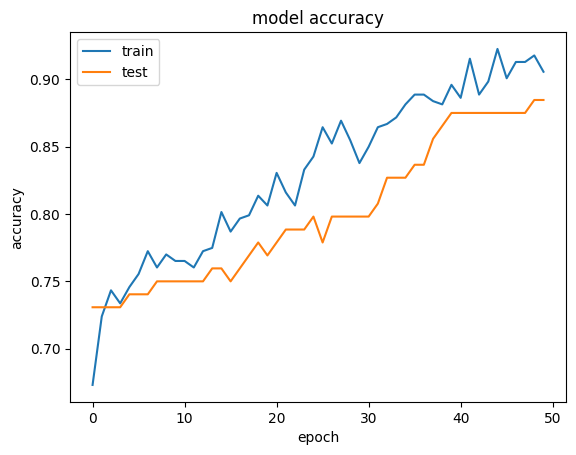

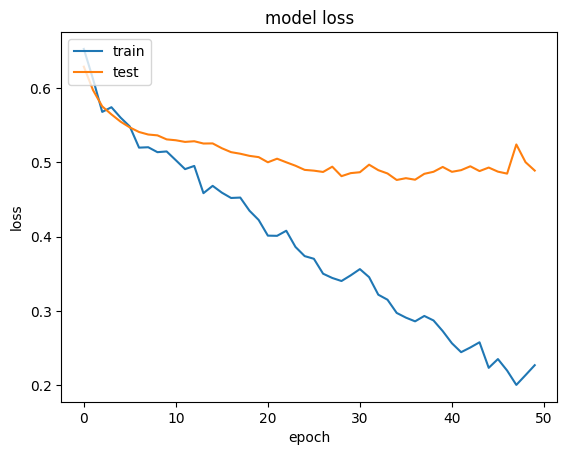

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualization

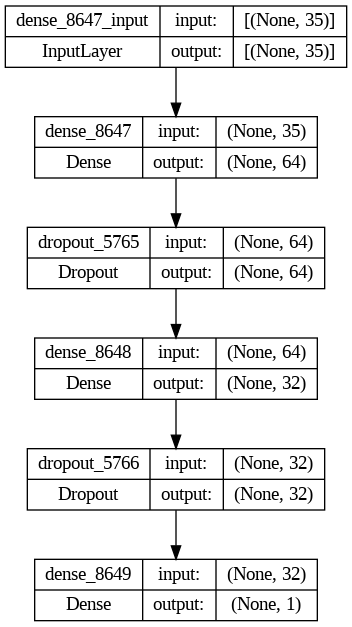

In [ ]:
from keras.utils import plot_model
plot_model(modelf, to_file='modelf.png', show_shapes=True)

#Visualization using ann_visualizer

In [ ]:
!pip install ann_visualizer


  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=6108b60573d3d73d3e6d5dce5089f5a0e8bfe02dfb6c8aecf7e86cfd0f7b25d1
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz
import graphviz

In [ ]:
ann_viz(modelf,filename='Forestfire.gv',title='forestfire Nueral networks')


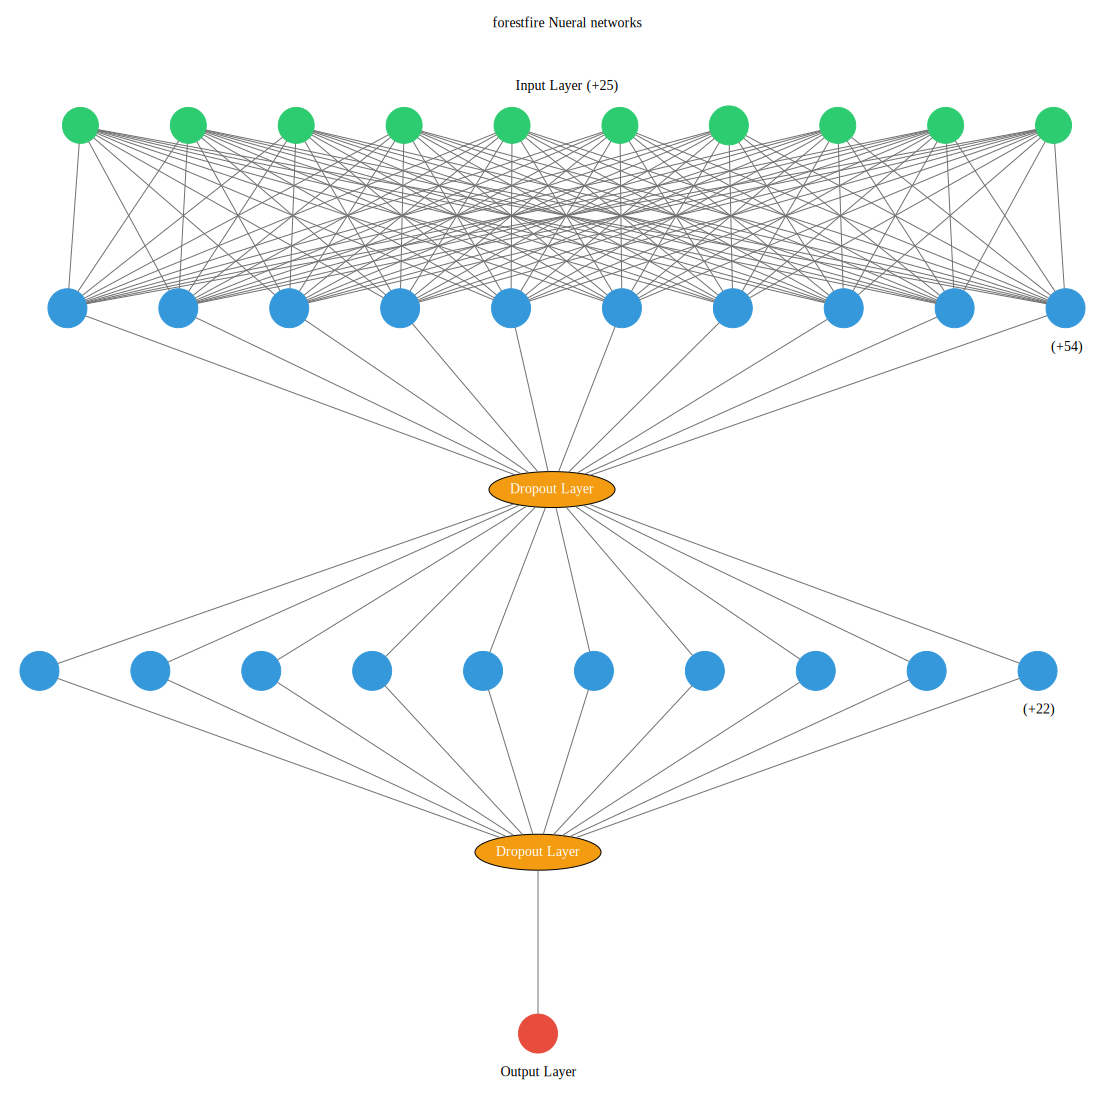

In [ ]:
graph_file=graphviz.Source.from_file('Forestfire.gv')
graph_file

In [ ]:
#model.save('Forestfire.h5')


#Visualization Using Tensor Board


In [ ]:
from tensorflow.keras.callbacks import TensorBoard


In [ ]:
# Set up the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs",histogram_freq=1)

In [ ]:
history = modelf.fit(X_train, y_train, epochs=50, batch_size=20,validation_data=(X_test, y_test),
                    callbacks=tensorboard_callback)

Epoch 1/50
21/21 [==============================] - 1s 38ms/step - loss: 0.2079 - accuracy: 0.9153 - val_loss: 0.4841 - val_accuracy: 0.8942
Epoch 2/50
21/21 [==============================] - 0s 19ms/step - loss: 0.1894 - accuracy: 0.9370 - val_loss: 0.4898 - val_accuracy: 0.8942
Epoch 3/50
21/21 [==============================] - 0s 8ms/step - loss: 0.2023 - accuracy: 0.9177 - val_loss: 0.4783 - val_accuracy: 0.8942
Epoch 4/50
21/21 [==============================] - 0s 8ms/step - loss: 0.2106 - accuracy: 0.9153 - val_loss: 0.4781 - val_accuracy: 0.8942
Epoch 5/50
21/21 [==============================] - 0s 13ms/step - loss: 0.1696 - accuracy: 0.9346 - val_loss: 0.4934 - val_accuracy: 0.8942
Epoch 6/50
21/21 [==============================] - 0s 13ms/step - loss: 0.1881 - accuracy: 0.9201 - val_loss: 0.4994 - val_accuracy: 0.8846
Epoch 7/50
21/21 [==============================] - 0s 8ms/step - loss: 0.1684 - accuracy: 0.9370 - val_loss: 0.5076 - val_accuracy: 0.8942
Epoch 8/50
21/21

In [ ]:
#!kill 28393


#conclusion
By tuning each parameters batch wise saperately we got our model parameters so by different visualization method we can see that the loss is reducing.